# Grades of Students dataset

Problem Statement:
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description    --  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

-

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

 

·       All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam



 

Predict   CGPA of a student based on different grades in four years.

Downlaod Files:

https://github.com/dsrscientist/dataset4

https://github.com/dsrscientist/dataset4/blob/main/Grades.csv

# Delete GitHub Links

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve


import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
df.head()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]

# Data Exploration

In [2]:
df.info()
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [3]:
print(df.isnull().sum())
print(df.size)

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64
24553


Data Set seems to have Null Values

In [4]:
df.isnull().sum().sum()


425

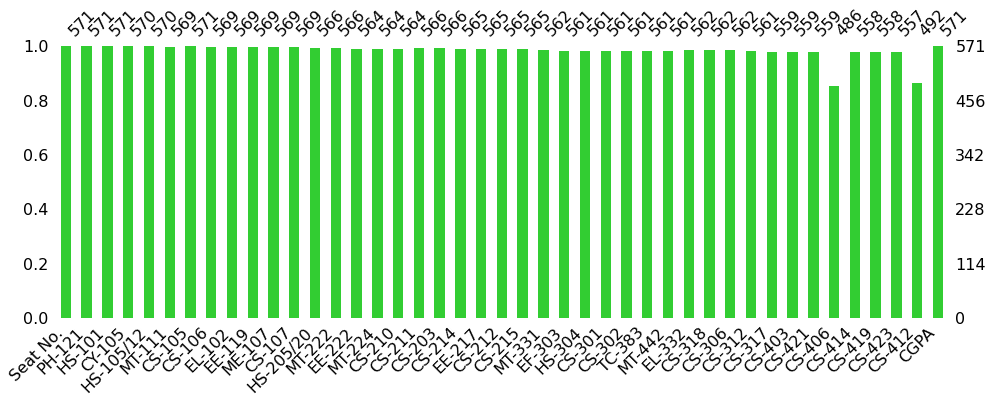

In [5]:
#!pip install missingno
import missingno as msno
msno.bar(df, figsize = (16,5),color = "#32CD32")
plt.show()

There are few gaps, which means that the dataset needs to be corrected.

In [6]:
df.duplicated().sum()

0

There are no duplicates of information

# Clean The Data

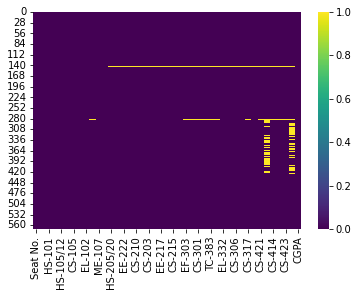

In [7]:
# Check if there is any missing value

sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

In [8]:

df.replace(np.nan,0, inplace = True)
df.head(10)     

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   
5  CS-97006      A     B-      B        D+     C+     A-     C+      B     B+   
6  CS-97007     B-     C-     A-         D     A-      B      A     B+     A-   
7  CS-97008     B+     B+     C+         C      C     A-     C-     A-      B   
8  CS-97009     A-      C     A-        D+      B     A-     A-     A-     B+   
9  CS-97010      A      B     C+         B      B     A-      C     B-     A-   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  
5  ...      C     B-     C+     C+     A-     A-     B+     B-      B  3.026  
6  ...     B-      C     B+     B-      A     A-     B+     B+      A  2.957  
7  ...     D+     B+     B+      C      A     B+     A-     A-     A-  3.043  
8  ...     B+      B     B-     C+      A     A-     B+     A-      A  3.358  
9  ...     C+     B-     B+     B-      A      A     A-      B      A  3.247  

[10 rows x 43 columns]

In [9]:
df.isnull().sum().sum()


0

Data Set is without null values

In [10]:
categorical = df.drop(["CS-403","CS-421","CS-406","CS-414","CS-419","CS-423","CS-412", 'MT-442',"Seat No.","CGPA"], axis=1)
target = df[["CGPA"]]

target.head()

CGPA
0  2.205
1  2.008
2  3.608
3  1.906
4  3.448

In [11]:
pd.unique(df["PH-121"])

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [12]:
grades_enc = {'B-':2.7, 'A':4, 'D':1.0, 'A-':3.7, 'B+':3.4, 'B':3.0, 'C+':2.4, 'C':2.0, 'C-':1.7, 'D+':1.4, 'WU':0.0, 'A+':4,'F':0.0,'W':0,'I':0}


In [13]:
type(categorical)

pandas.core.frame.DataFrame

In [14]:
for item in categorical:
      categorical[item] = categorical[item].replace(grades_enc)

categorical.head()

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  EE-119  \
0     2.7     1.4     1.7        2.0     1.7     1.4     1.0     1.7     2.7   
1     4.0     1.0     1.4        1.0     2.7     2.0     1.0     4.0     1.4   
2     4.0     3.0     4.0        2.7     3.4     4.0     2.7     3.4     3.7   
3     1.0     2.4     1.4        1.0     1.0     3.7     1.4     1.7     1.0   
4     3.7     3.7     3.7        3.4     4.0     4.0     3.7     3.4     4.0   

   ME-107  ...  EF-303  HS-304  CS-301  CS-302  TC-383  EL-332  CS-318  \
0     1.7  ...     1.7     2.4     3.0     2.0     2.4     2.0     1.7   
1     1.0  ...     1.0     1.7     3.7     1.4     1.7     2.0     3.7   
2     3.7  ...     2.4     4.0     3.4     3.7     3.0     3.4     3.7   
3     2.4  ...     1.0     2.7     1.0     2.7     1.4     1.4     3.4   
4     3.7  ...     1.7     3.7     2.7     3.7     2.4     3.7     2.7   

   CS-306  CS-312  CS-317  
0     2.0     1.7     1.7  
1     1.0     1.4     1.0  
2     3.7     3.0     3.0  
3     1.7     1.4     2.0  
4     3.7     2.7     3.4  

[5 rows x 33 columns]

In [15]:
# Concating inputs and targets for data insights
df = pd.concat([categorical, target], axis=1)
df

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0       2.7     1.4     1.7        2.0     1.7     1.4     1.0     1.7   
1       4.0     1.0     1.4        1.0     2.7     2.0     1.0     4.0   
2       4.0     3.0     4.0        2.7     3.4     4.0     2.7     3.4   
3       1.0     2.4     1.4        1.0     1.0     3.7     1.4     1.7   
4       3.7     3.7     3.7        3.4     4.0     4.0     3.7     3.4   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566     3.0     4.0     4.0        3.7     4.0     4.0     3.7     3.7   
567     4.0     4.0     4.0        4.0     4.0     4.0     4.0     3.7   
568     3.0     4.0     3.7        3.4     4.0     4.0     4.0     4.0   
569     4.0     3.4     1.0        4.0     1.0     1.4     2.7     1.7   
570     2.0     1.0     1.0        2.0     2.0     1.4     3.0     2.4   

     EE-119  ME-107  ...  HS-304  CS-301  CS-302  TC-383  EL-332  CS-318  \
0       2.7     1.7  ...     2.4     3.0     2.0     2.4     2.0     1.7   
1       1.4     1.0  ...     1.7     3.7     1.4     1.7     2.0     3.7   
2       3.7     3.7  ...     4.0     3.4     3.7     3.0     3.4     3.7   
3       1.0     2.4  ...     2.7     1.0     2.7     1.4     1.4     3.4   
4       4.0     3.7  ...     3.7     2.7     3.7     2.4     3.7     2.7   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566     4.0     3.4  ...     3.7     3.7     4.0     4.0     4.0     4.0   
567     4.0     4.0  ...     4.0     4.0     4.0     4.0     4.0     4.0   
568     4.0     3.0  ...     2.7     3.4     3.4     4.0     3.0     2.4   
569     2.7     1.7  ...     2.0     2.0     2.4     1.7     1.0     2.7   
570     2.0     1.4  ...     0.0     1.0     1.0     2.0     0.0     1.7   

     CS-306  CS-312  CS-317   CGPA  
0       2.0     1.7     1.7  2.205  
1       1.0     1.4     1.0  2.008  
2       3.7     3.0     3.0  3.608  
3       1.7     1.4     2.0  1.906  
4       3.7     2.7     3.4  3.448  
..      ...     ...     ...    ...  
566     3.4     3.7     3.7  3.798  
567     3.7     3.4     3.4  3.772  
568     3.4     3.7     3.0  3.470  
569     3.4     1.0     3.0  2.193  
570     1.4     2.4     2.0  1.753  

[571 rows x 34 columns]

# Discover and Visualize the Data to Gain Insights:


In [16]:
# Get the unique values of 'poutcome' column
print(df['PH-121'].unique())
print( )
print(df['PH-121'].value_counts())
print( )
# print(df.CGPA.unique())
# print( )
print(df['CGPA'].value_counts())

[2.7 4.  1.  3.7 3.4 3.  2.4 2.  1.7 1.4 0. ]

4.0    133
3.7    112
3.4     61
3.0     57
2.7     56
1.0     44
2.0     33
2.4     31
1.4     22
1.7     19
0.0      3
Name: PH-121, dtype: int64

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64


# Uni Variate Analysis

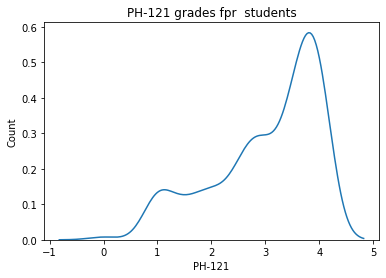

In [17]:
b = sns.kdeplot(df['PH-121'])    # Kernel Density Estimations
b.axes.set_title('PH-121 grades fpr  students')
b.set_xlabel('PH-121')
b.set_ylabel('Count')
plt.show()

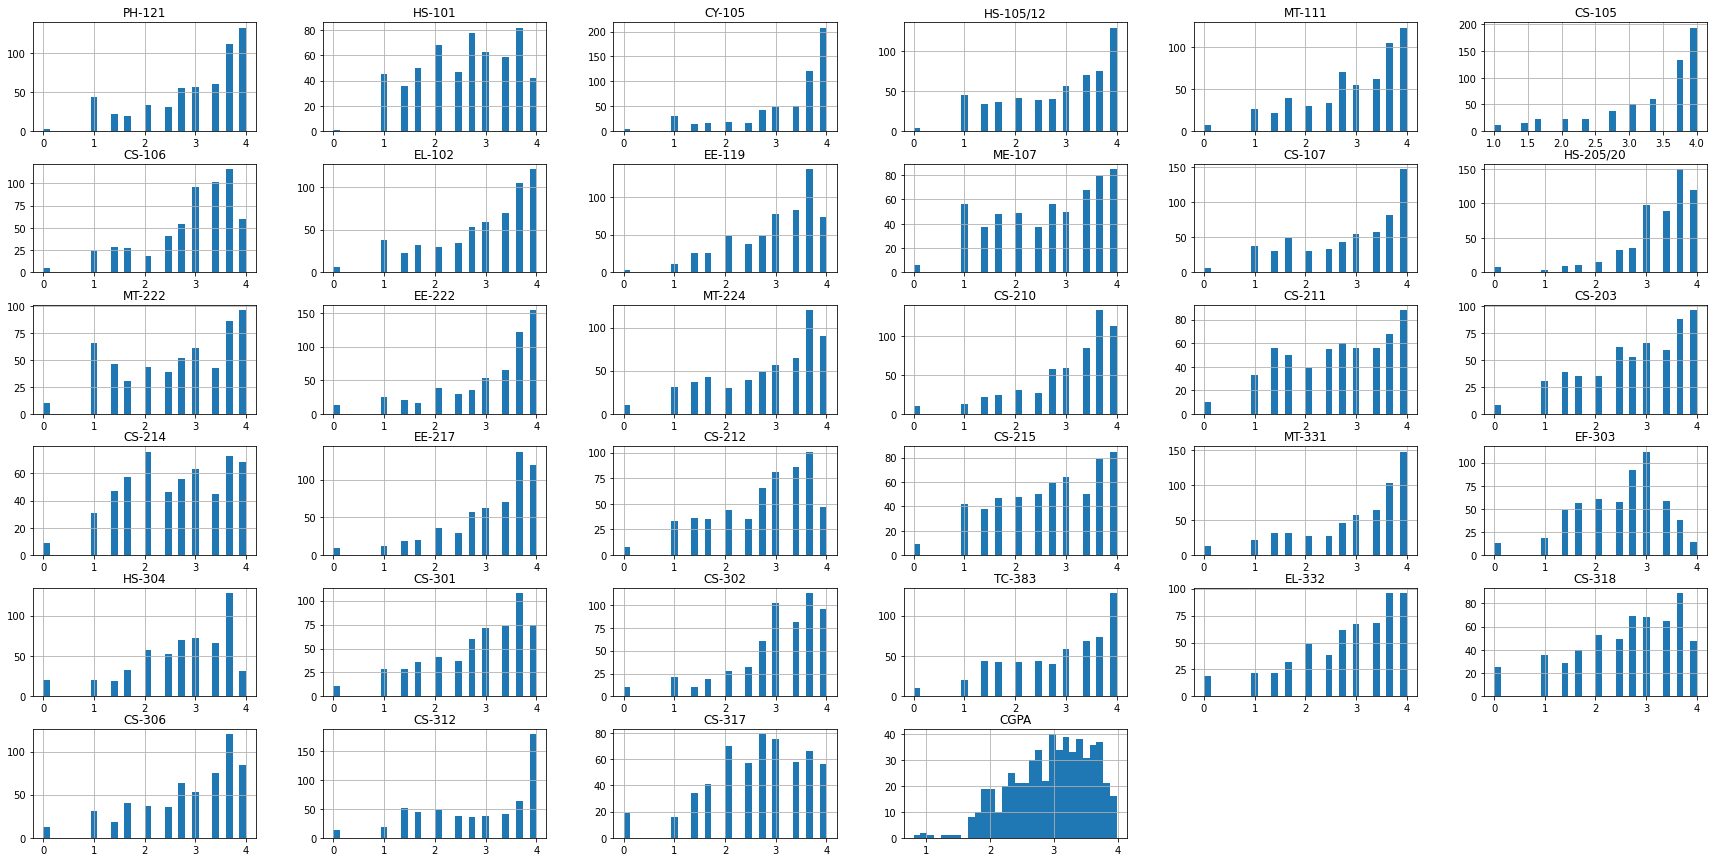

In [18]:
df.hist(bins=30,figsize=(30,15))
plt.show()

Data is distributed from 0 to 4 CGPA

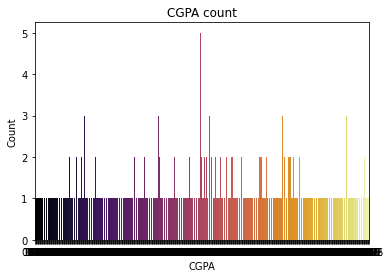

<AxesSubplot: ylabel='CGPA'>

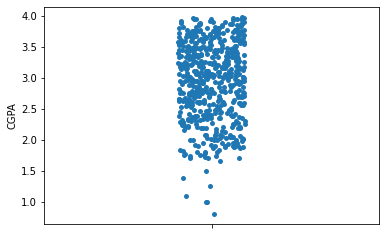

In [19]:
b = sns.countplot(x='CGPA', data=df, palette='inferno')
b.axes.set_title('CGPA count')
b.set_xlabel("CGPA")
b.set_ylabel("Count")
plt.show()

sns.stripplot(df['CGPA'])


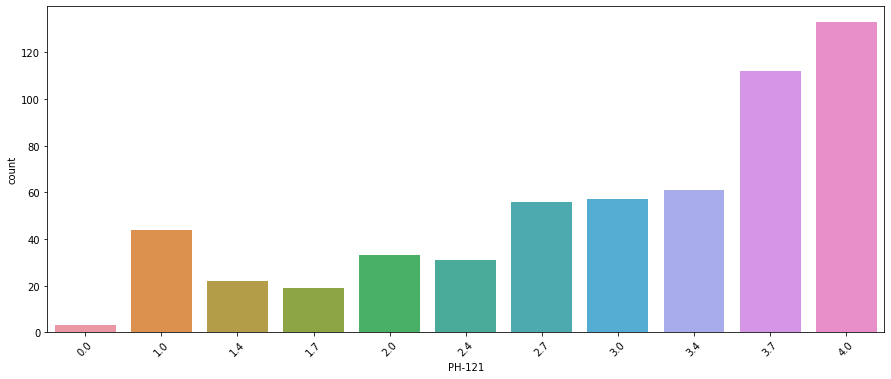

<Figure size 432x288 with 0 Axes>

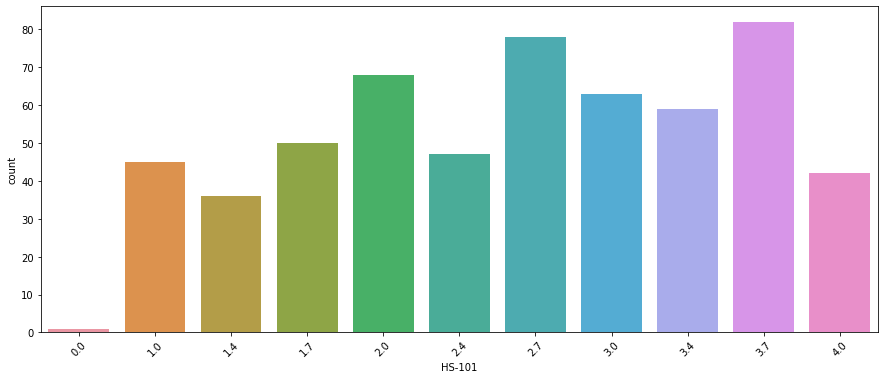

<Figure size 432x288 with 0 Axes>

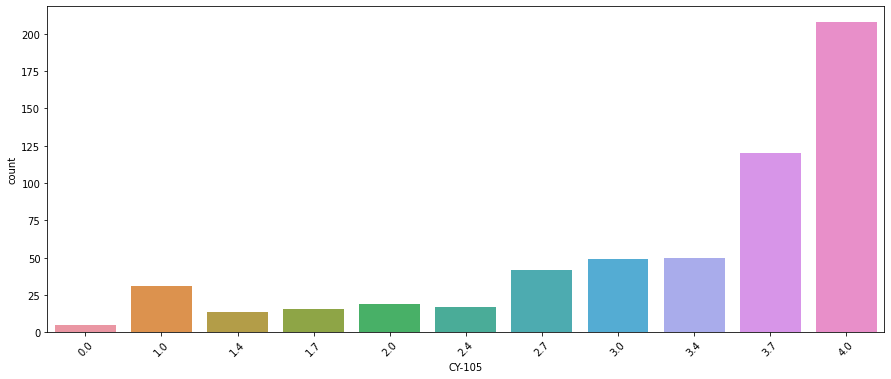

<Figure size 432x288 with 0 Axes>

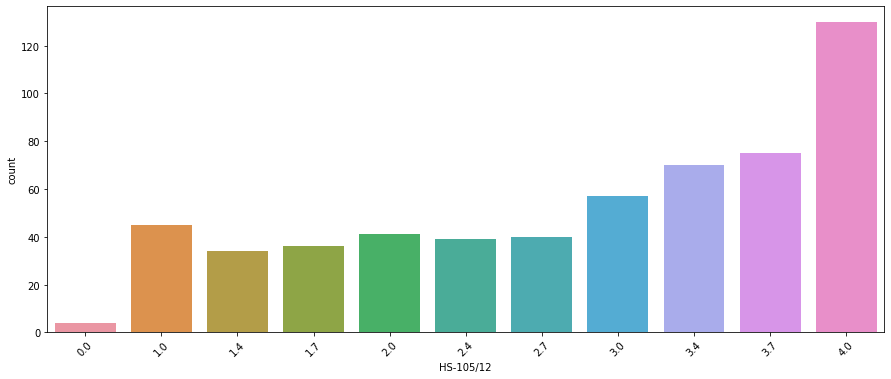

<Figure size 432x288 with 0 Axes>

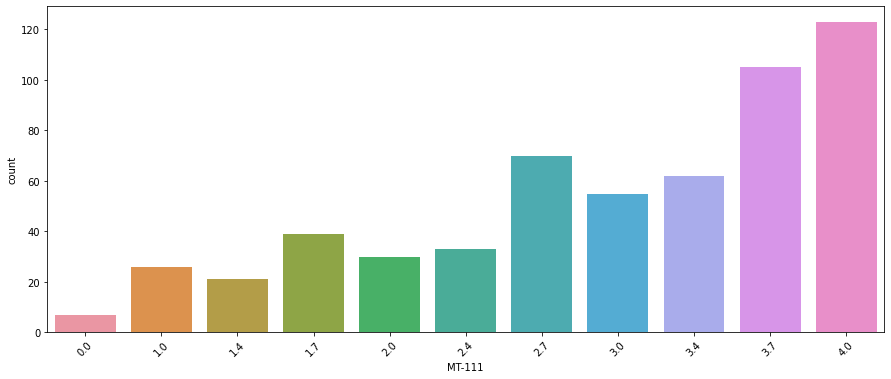

<Figure size 432x288 with 0 Axes>

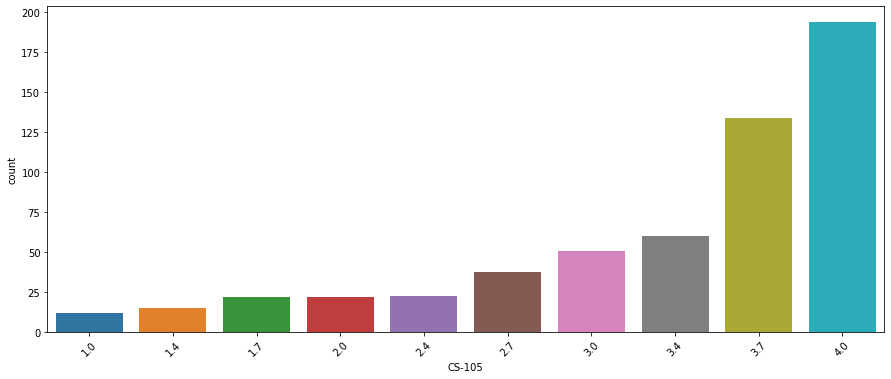

<Figure size 432x288 with 0 Axes>

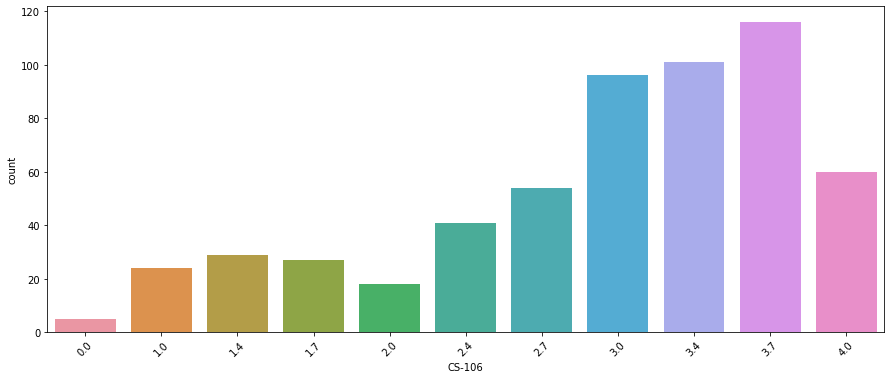

<Figure size 432x288 with 0 Axes>

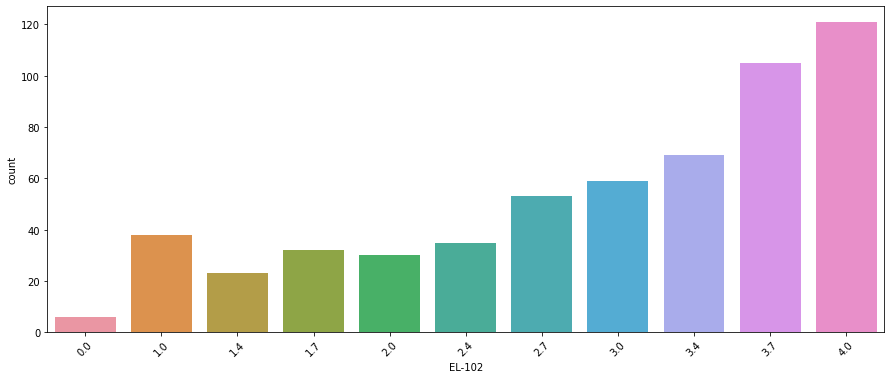

<Figure size 432x288 with 0 Axes>

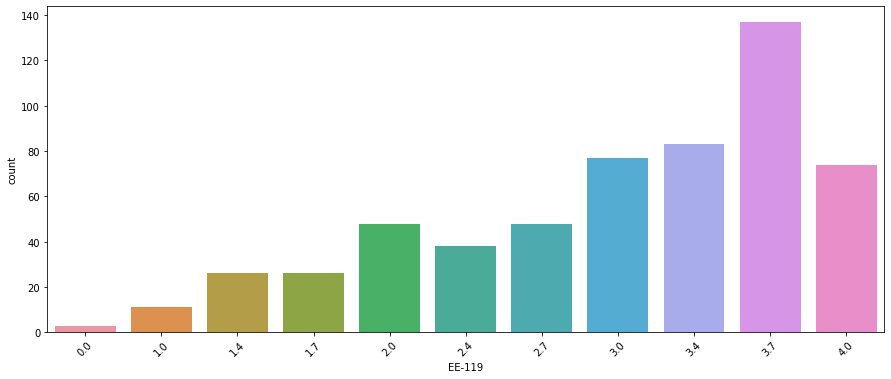

<Figure size 432x288 with 0 Axes>

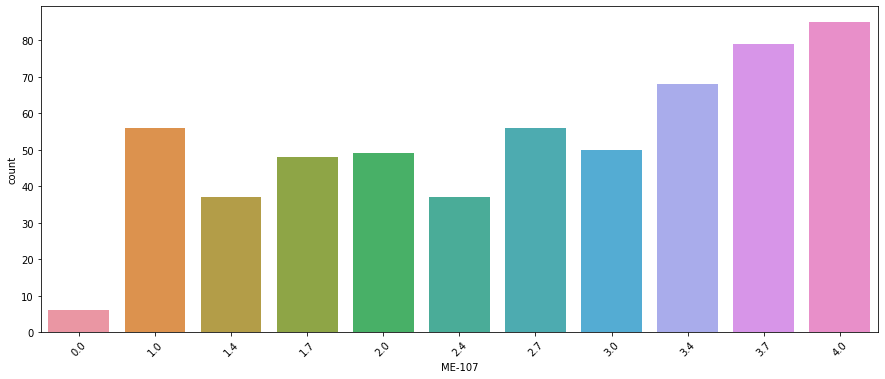

<Figure size 432x288 with 0 Axes>

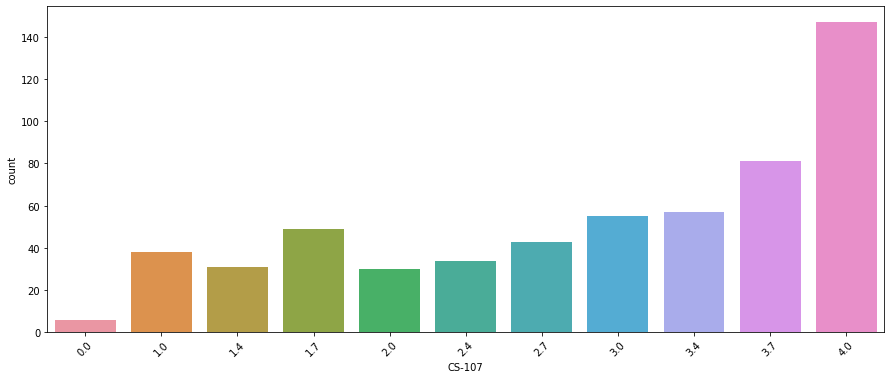

<Figure size 432x288 with 0 Axes>

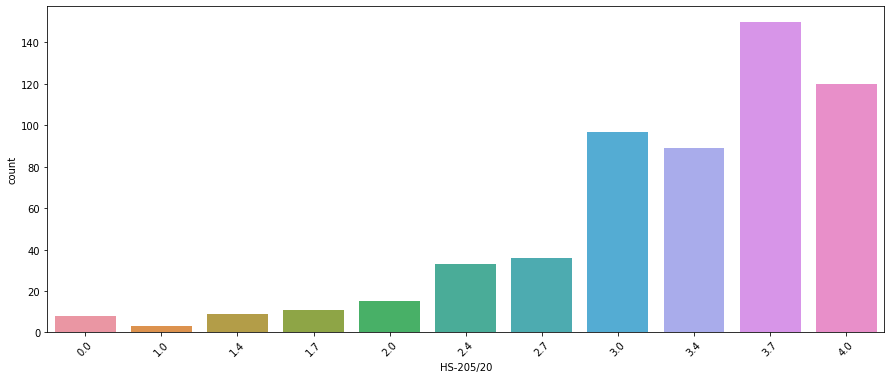

<Figure size 432x288 with 0 Axes>

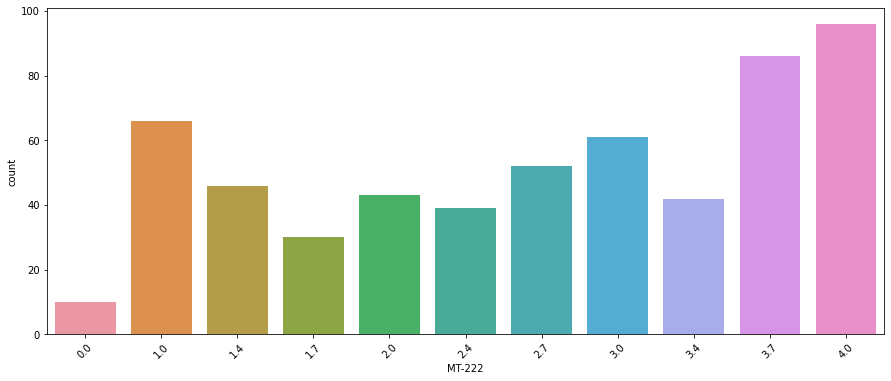

<Figure size 432x288 with 0 Axes>

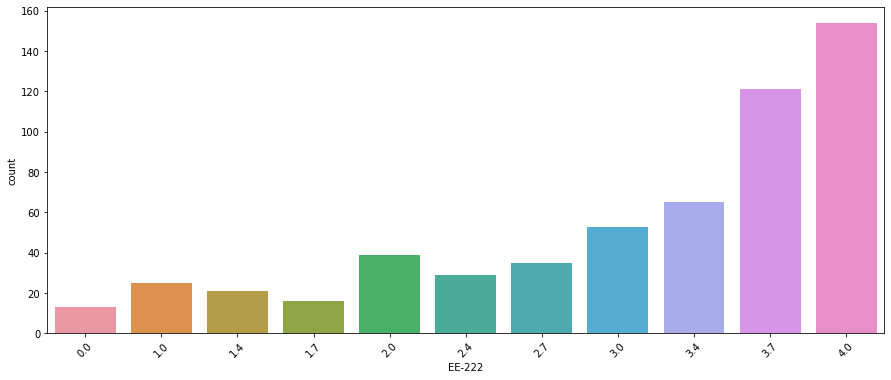

<Figure size 432x288 with 0 Axes>

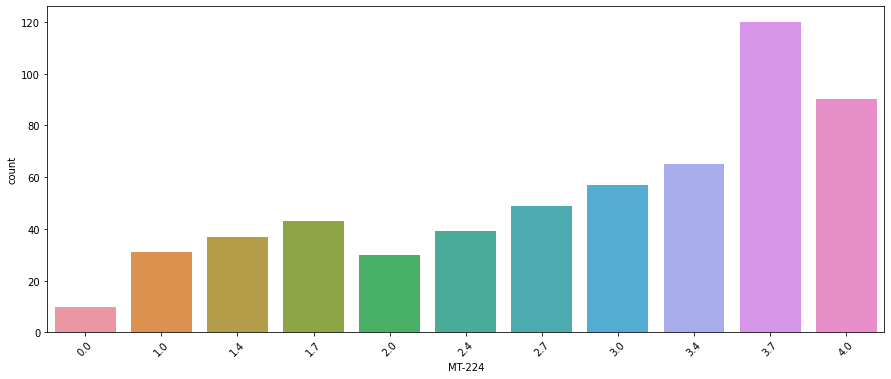

<Figure size 432x288 with 0 Axes>

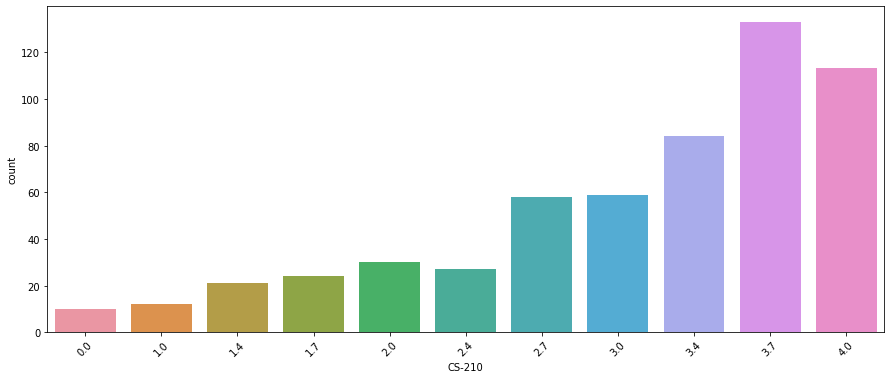

<Figure size 432x288 with 0 Axes>

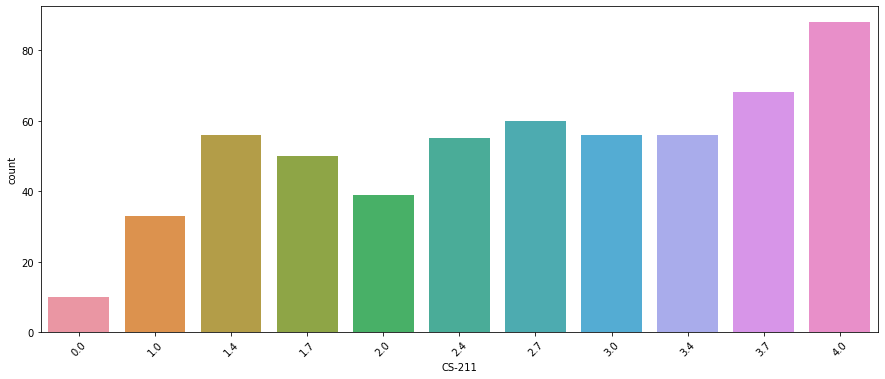

<Figure size 432x288 with 0 Axes>

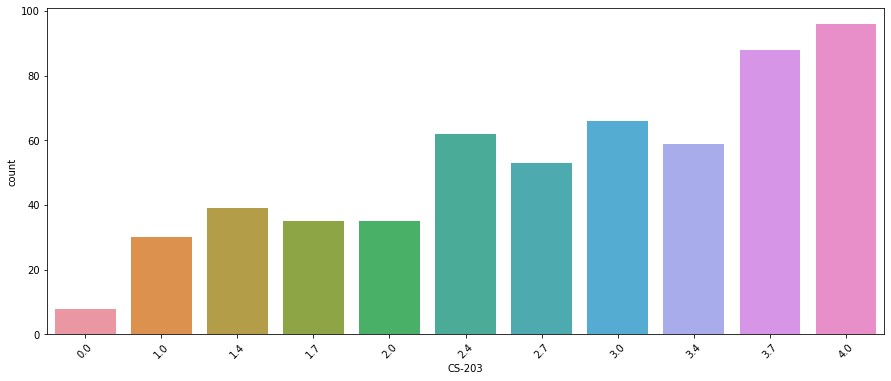

<Figure size 432x288 with 0 Axes>

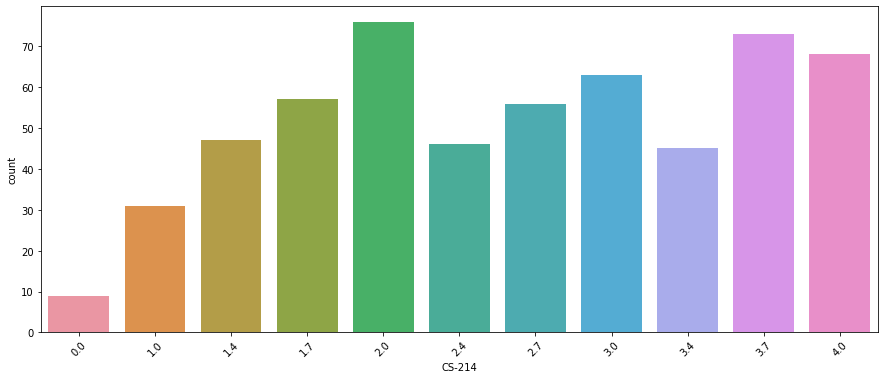

<Figure size 432x288 with 0 Axes>

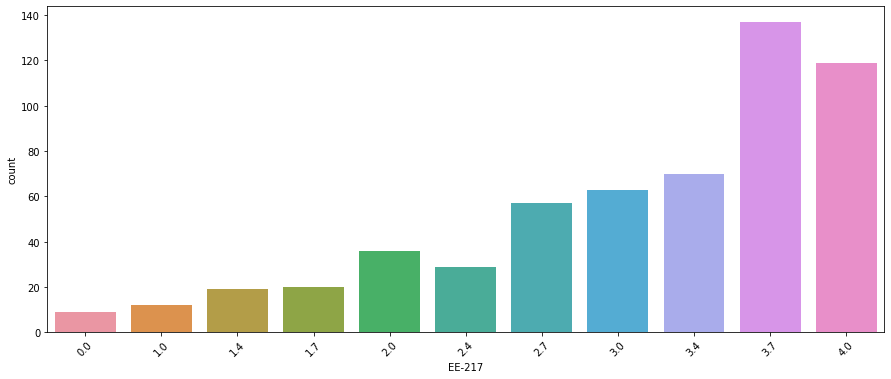

<Figure size 432x288 with 0 Axes>

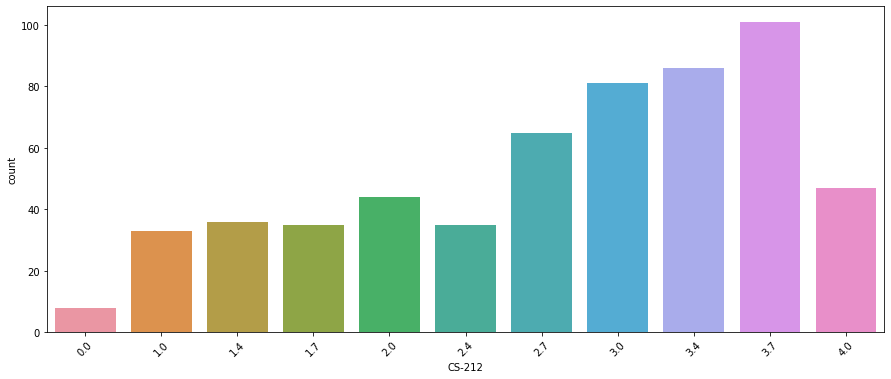

<Figure size 432x288 with 0 Axes>

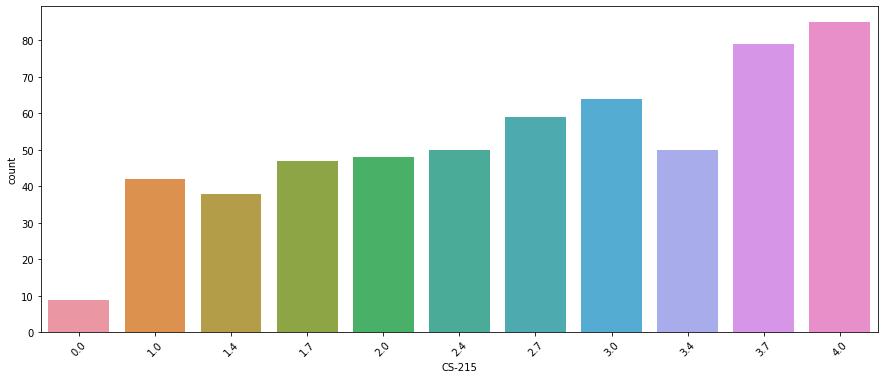

<Figure size 432x288 with 0 Axes>

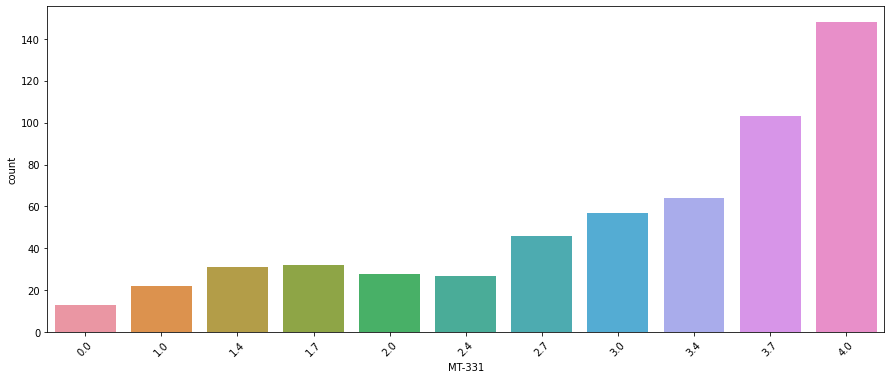

<Figure size 432x288 with 0 Axes>

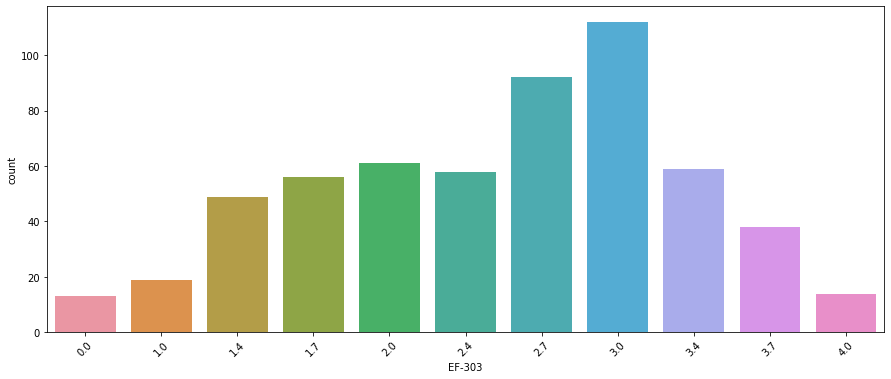

<Figure size 432x288 with 0 Axes>

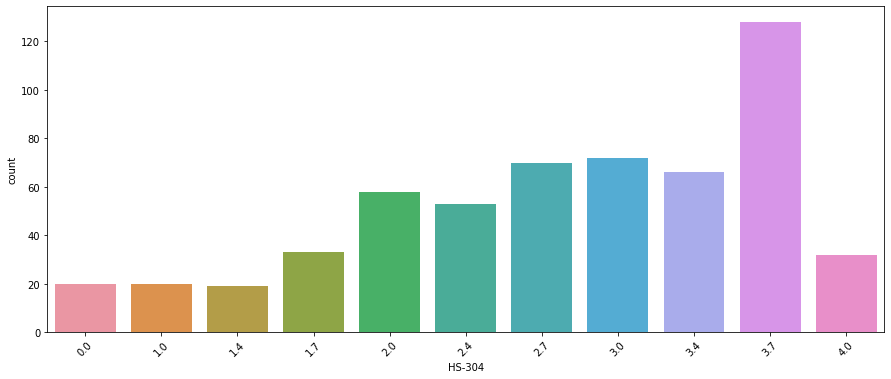

<Figure size 432x288 with 0 Axes>

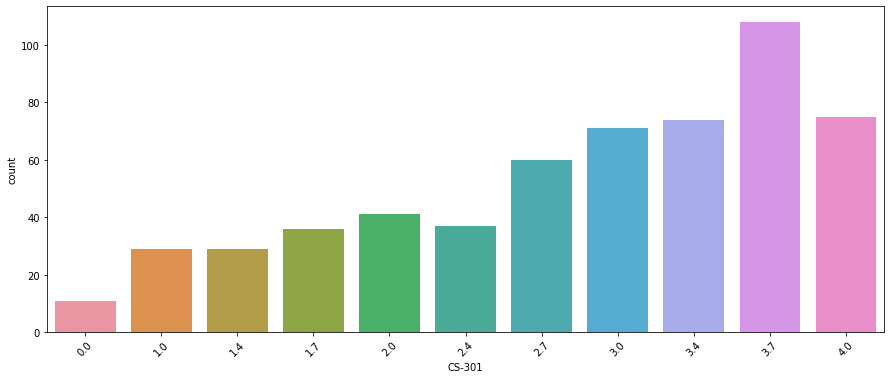

<Figure size 432x288 with 0 Axes>

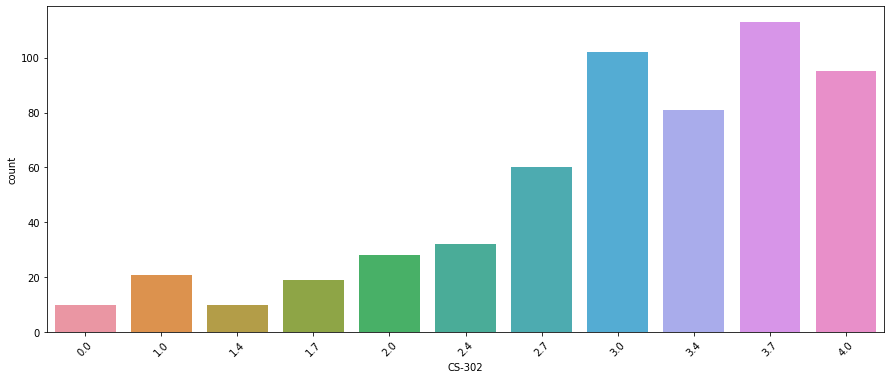

<Figure size 432x288 with 0 Axes>

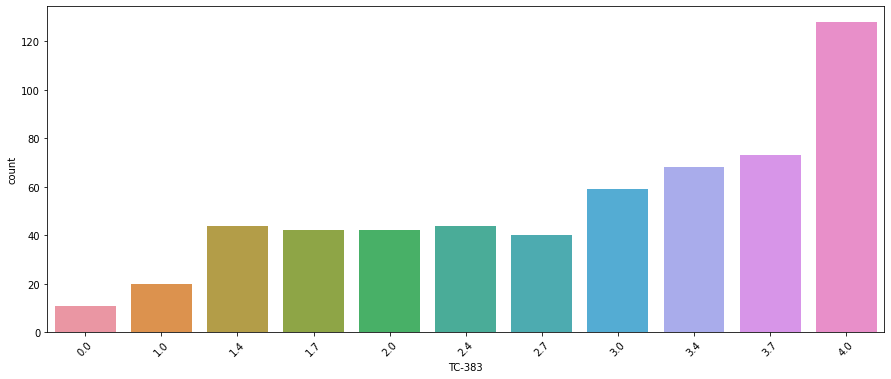

<Figure size 432x288 with 0 Axes>

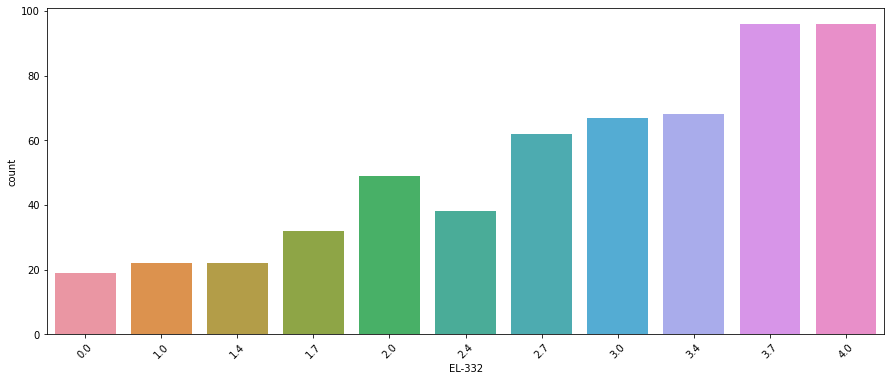

<Figure size 432x288 with 0 Axes>

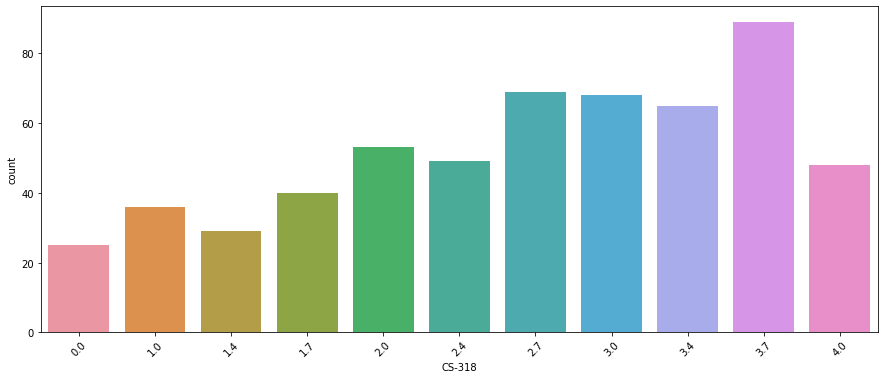

<Figure size 432x288 with 0 Axes>

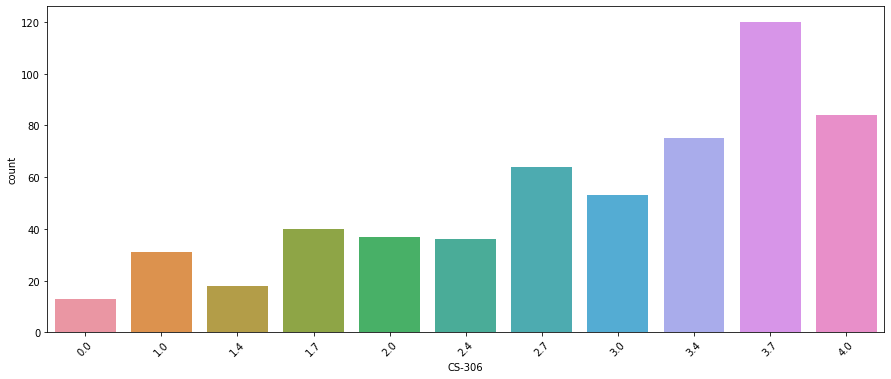

<Figure size 432x288 with 0 Axes>

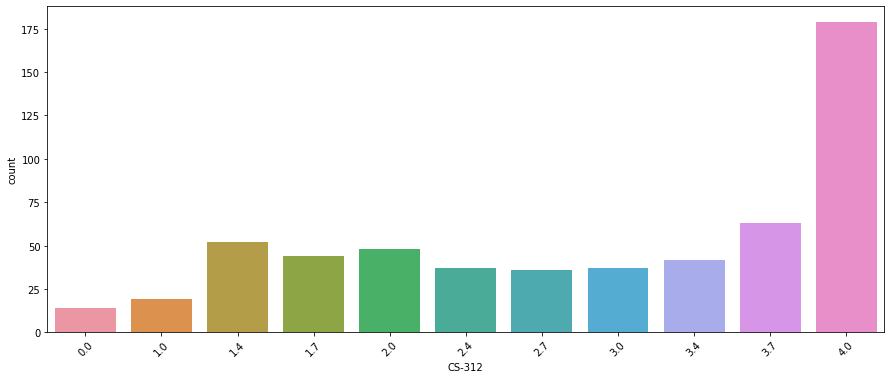

<Figure size 432x288 with 0 Axes>

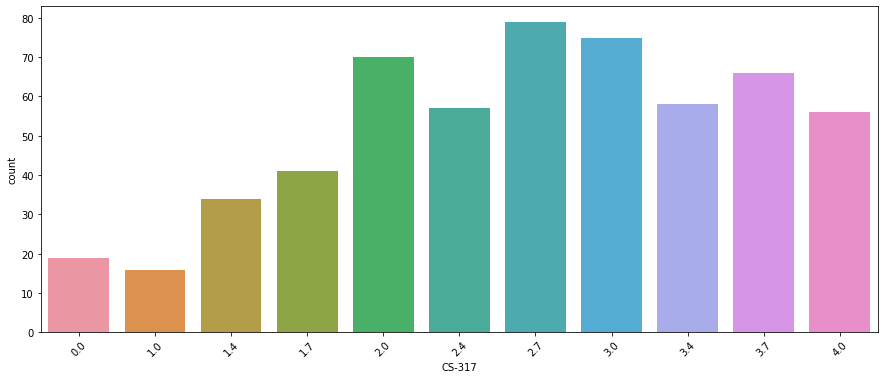

<Figure size 432x288 with 0 Axes>

In [20]:
for i in categorical.columns:
        plt.figure(figsize=(15,6))
        sns.countplot(x=df[i])
        plt.xticks(rotation=45)
        plt.figure()

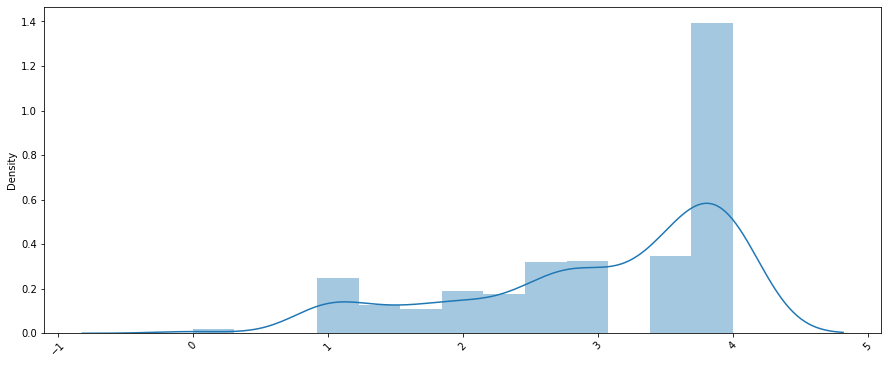

<Figure size 432x288 with 0 Axes>

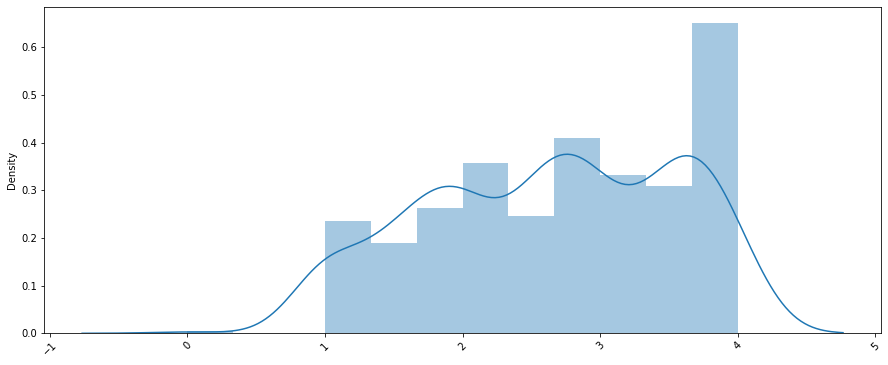

<Figure size 432x288 with 0 Axes>

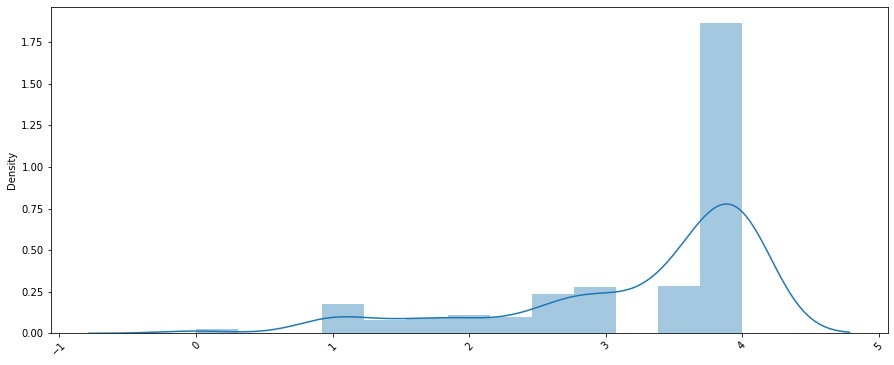

<Figure size 432x288 with 0 Axes>

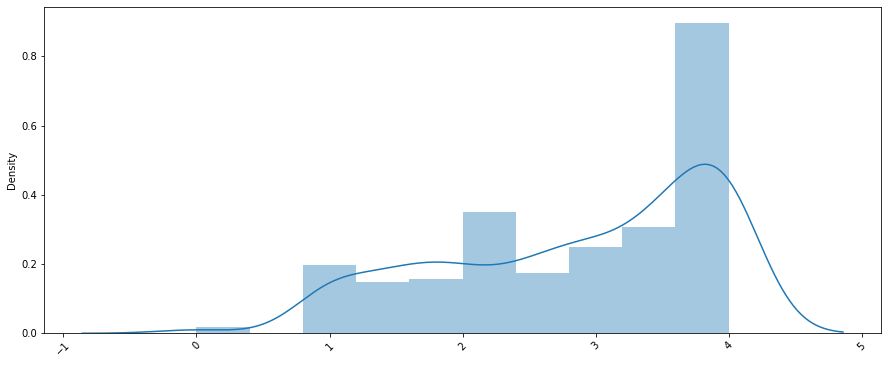

<Figure size 432x288 with 0 Axes>

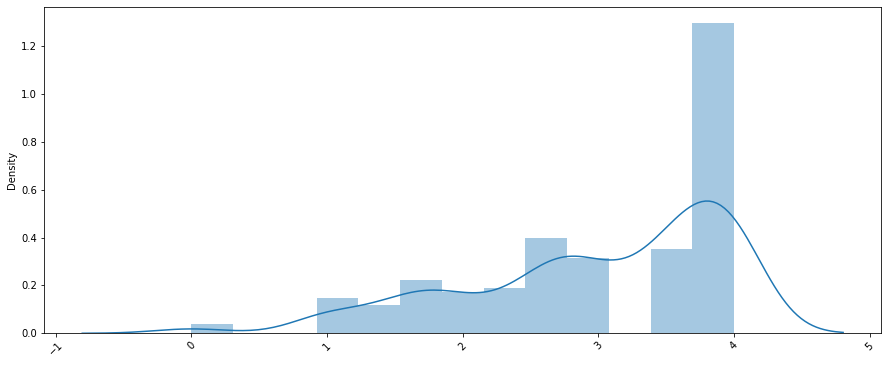

<Figure size 432x288 with 0 Axes>

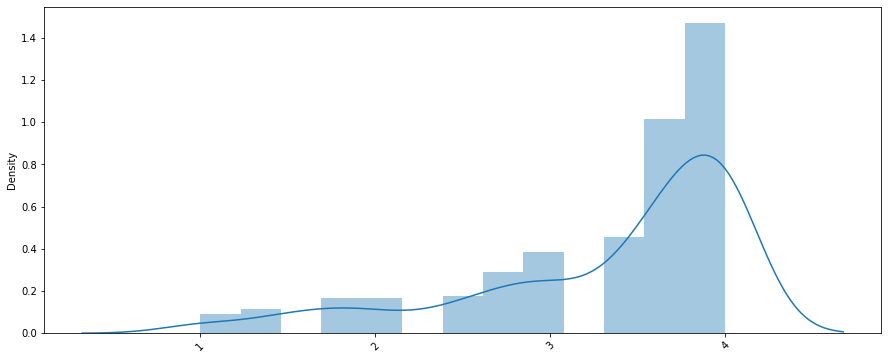

<Figure size 432x288 with 0 Axes>

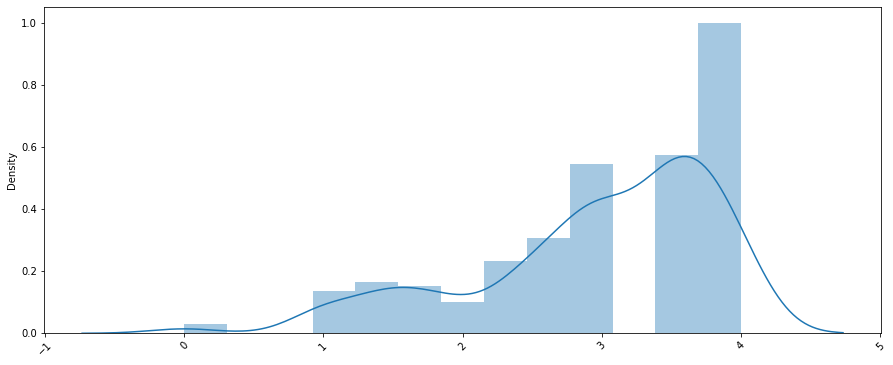

<Figure size 432x288 with 0 Axes>

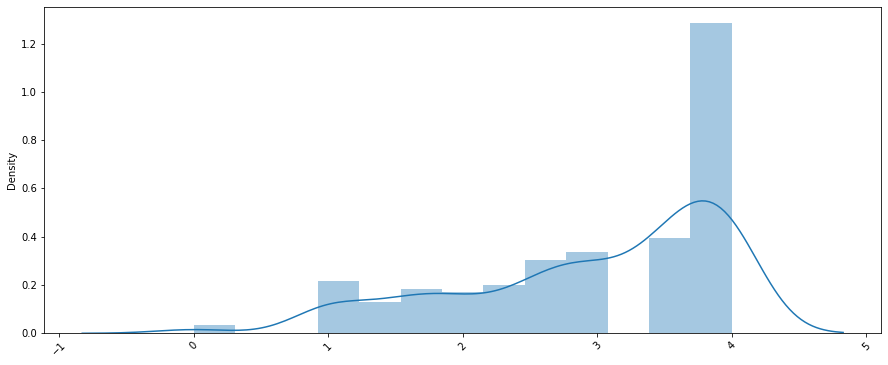

<Figure size 432x288 with 0 Axes>

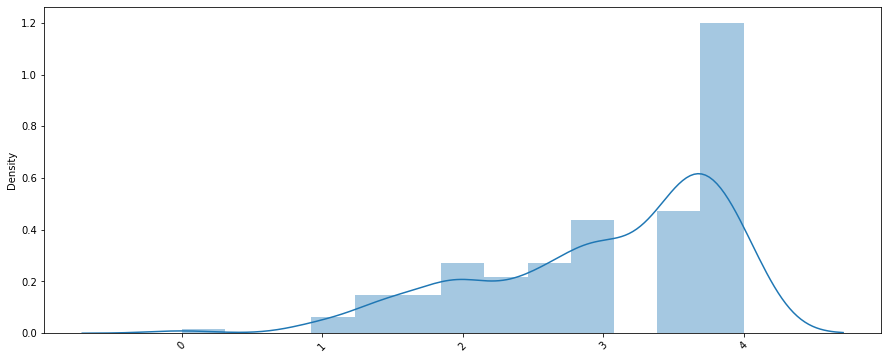

<Figure size 432x288 with 0 Axes>

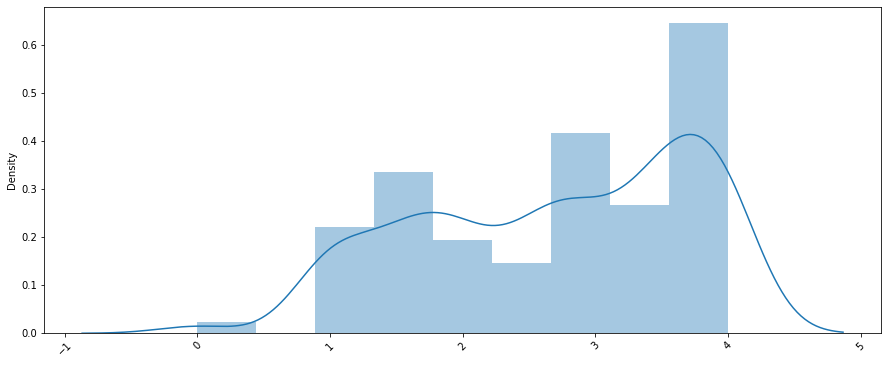

<Figure size 432x288 with 0 Axes>

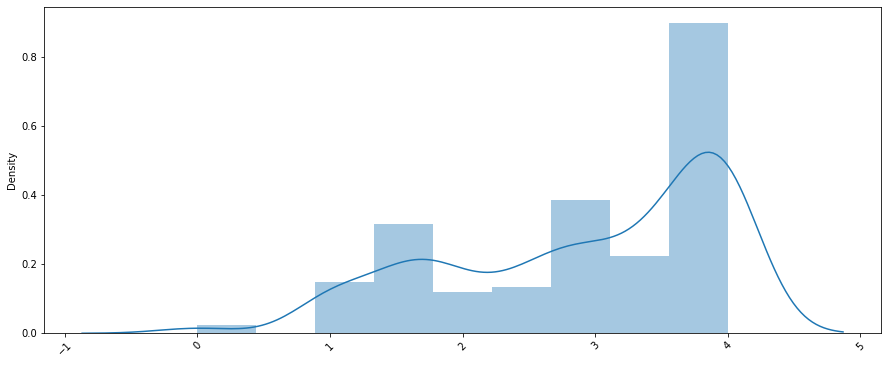

<Figure size 432x288 with 0 Axes>

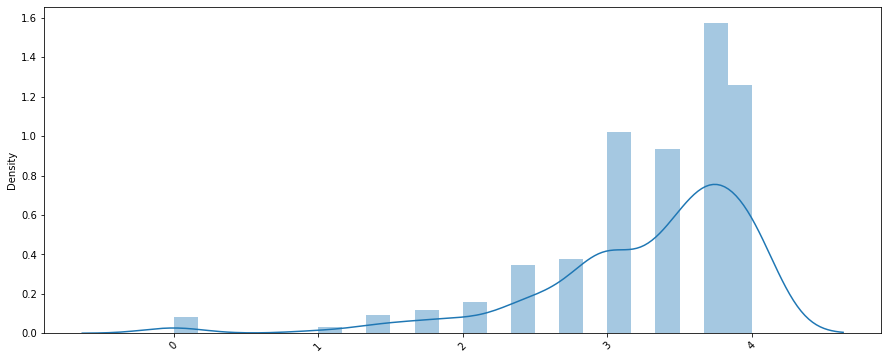

<Figure size 432x288 with 0 Axes>

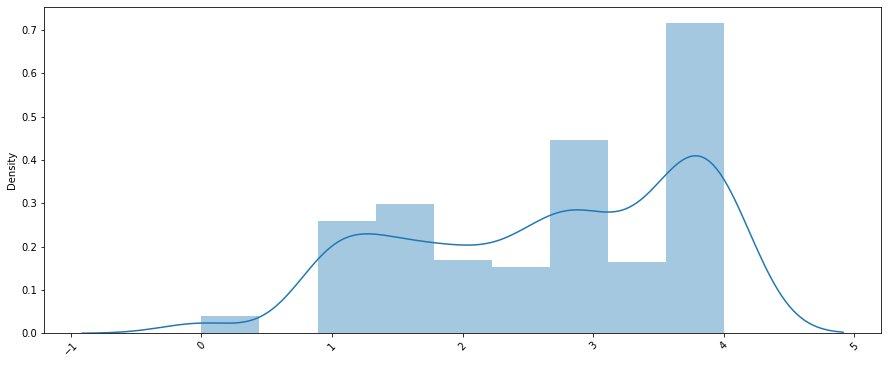

<Figure size 432x288 with 0 Axes>

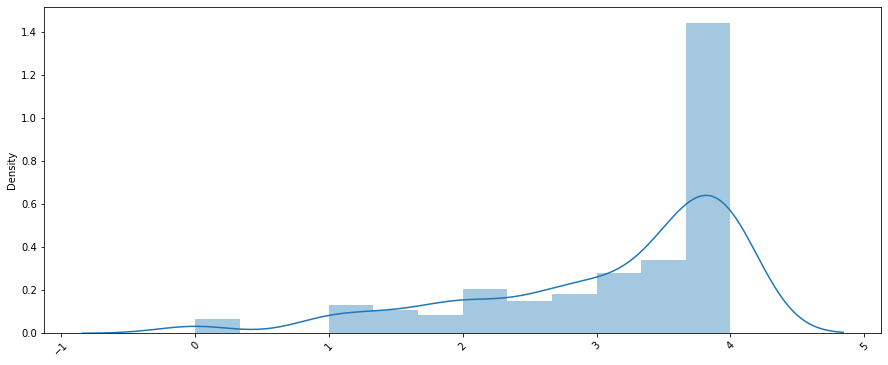

<Figure size 432x288 with 0 Axes>

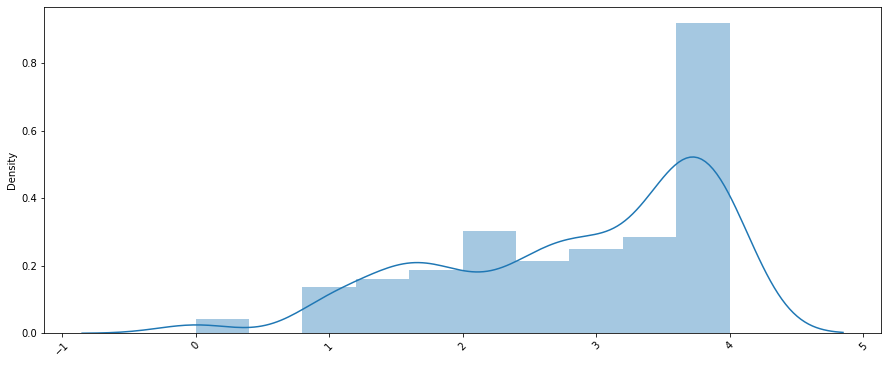

<Figure size 432x288 with 0 Axes>

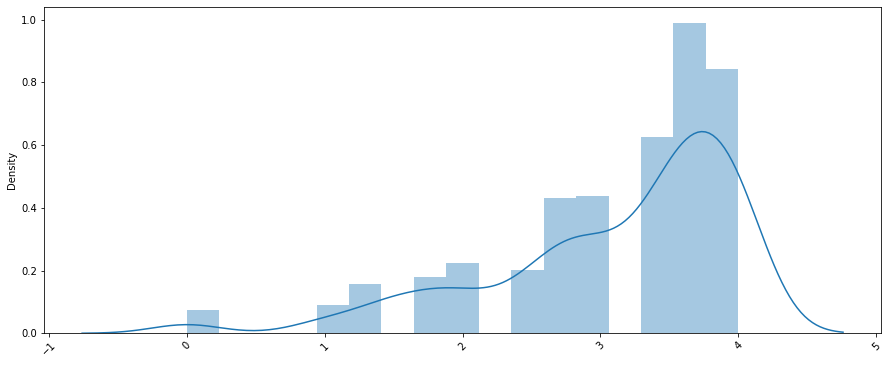

<Figure size 432x288 with 0 Axes>

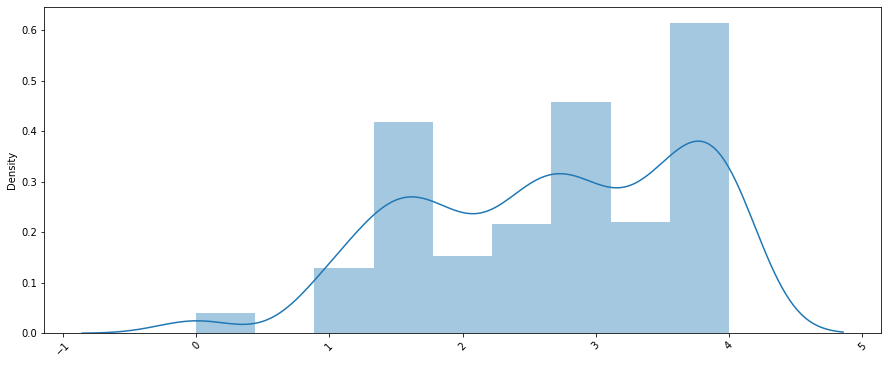

<Figure size 432x288 with 0 Axes>

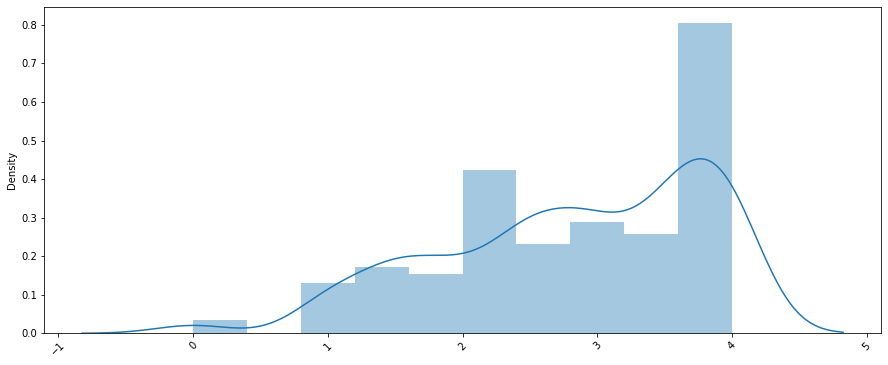

<Figure size 432x288 with 0 Axes>

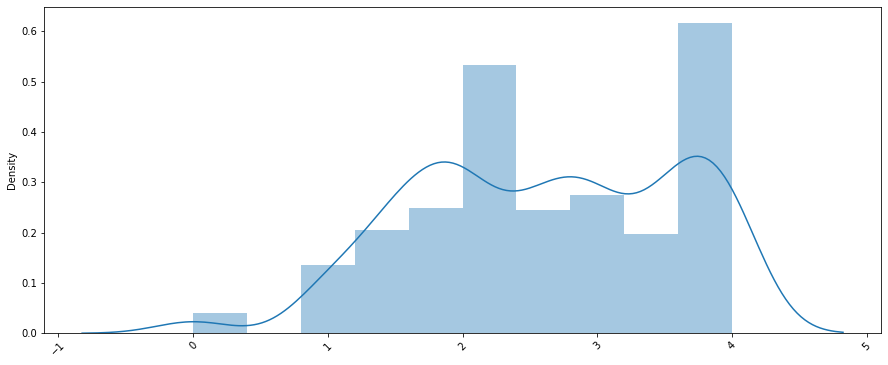

<Figure size 432x288 with 0 Axes>

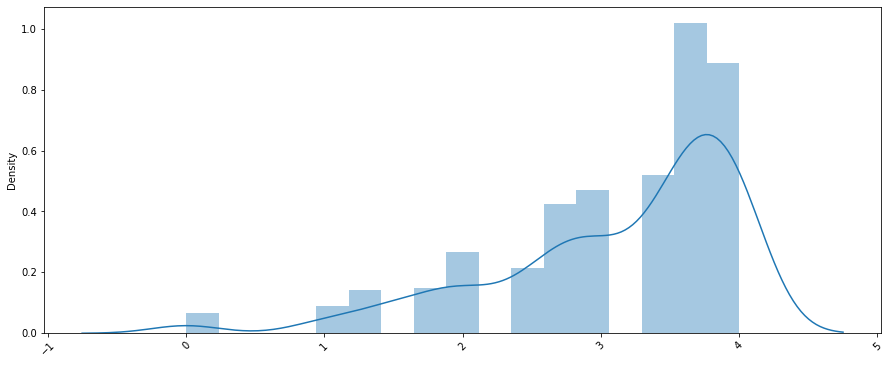

<Figure size 432x288 with 0 Axes>

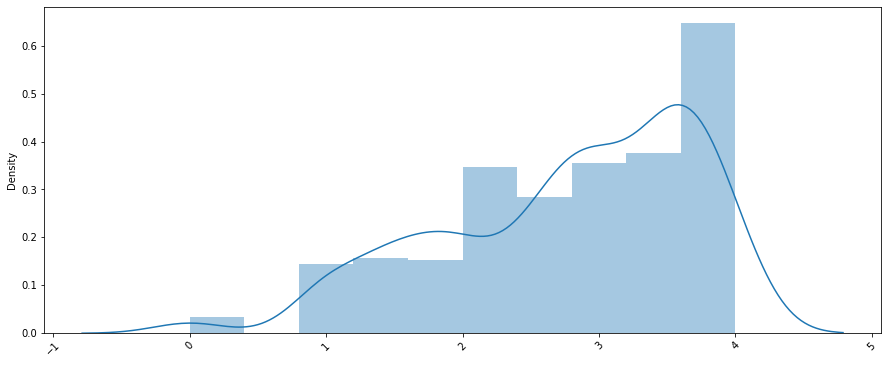

<Figure size 432x288 with 0 Axes>

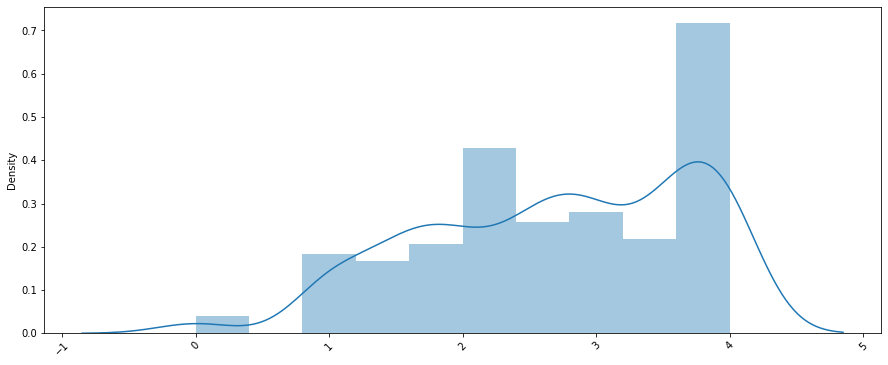

<Figure size 432x288 with 0 Axes>

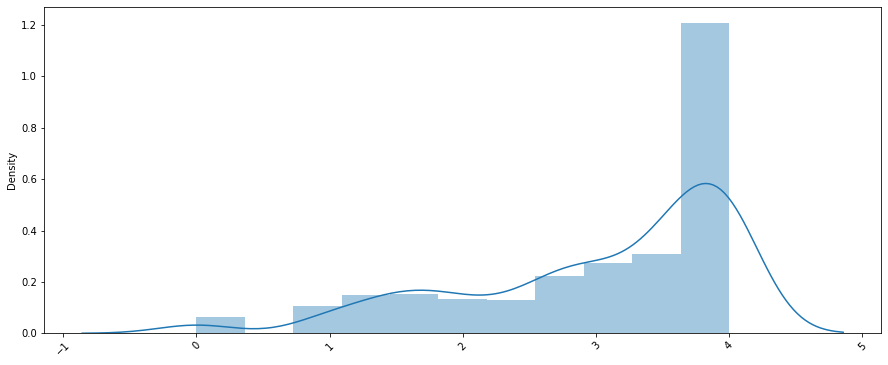

<Figure size 432x288 with 0 Axes>

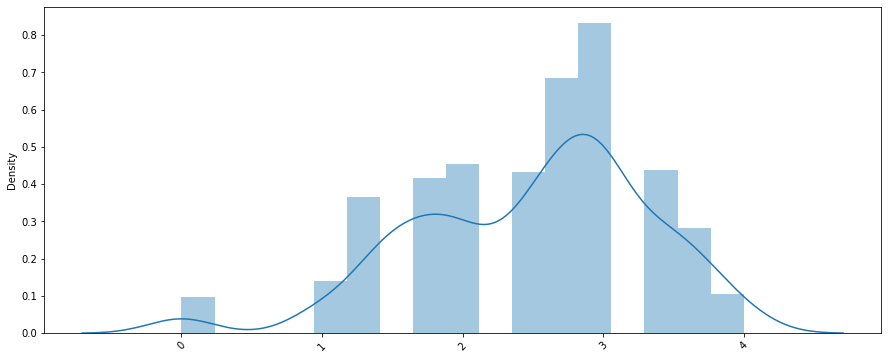

<Figure size 432x288 with 0 Axes>

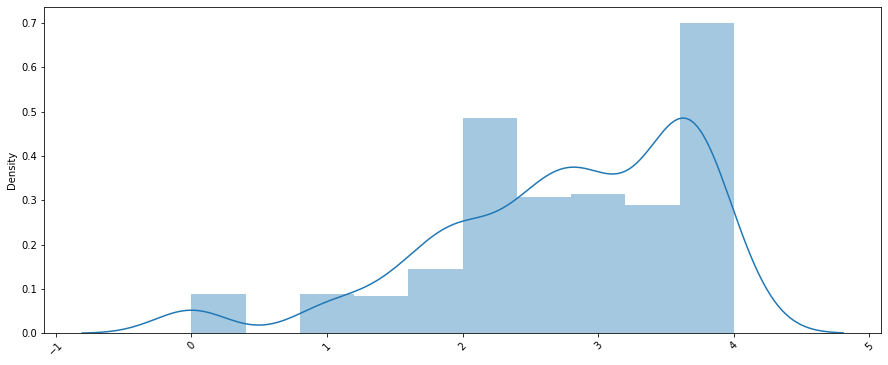

<Figure size 432x288 with 0 Axes>

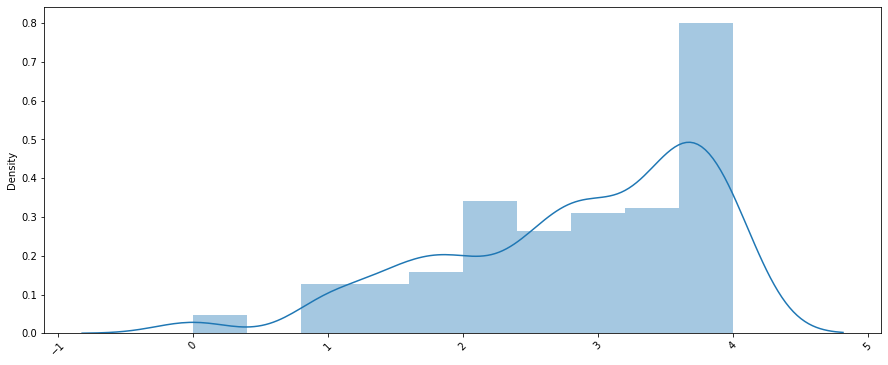

<Figure size 432x288 with 0 Axes>

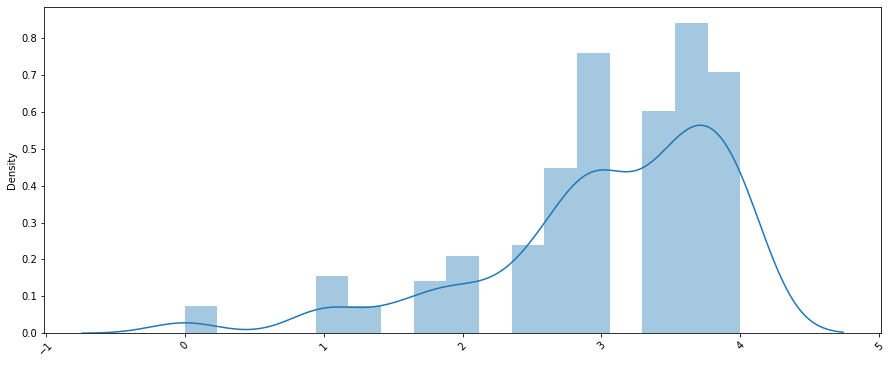

<Figure size 432x288 with 0 Axes>

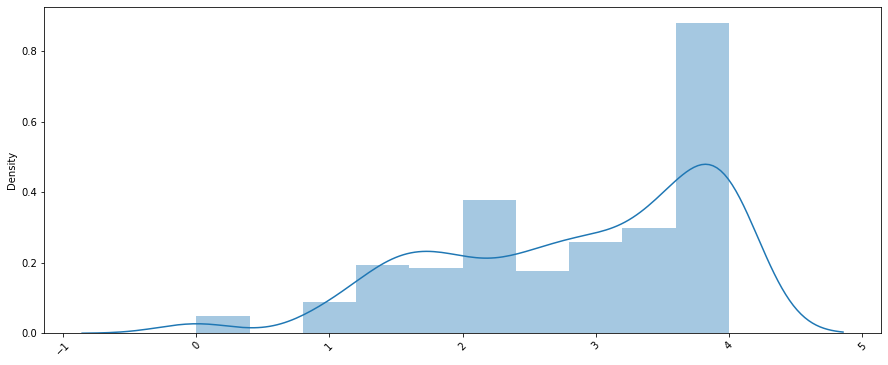

<Figure size 432x288 with 0 Axes>

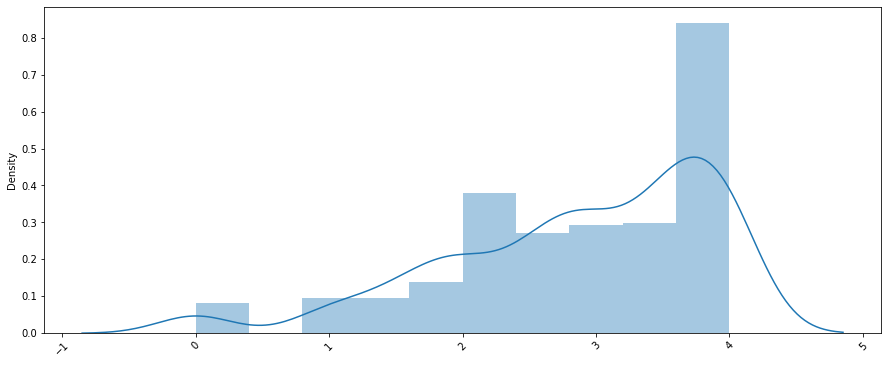

<Figure size 432x288 with 0 Axes>

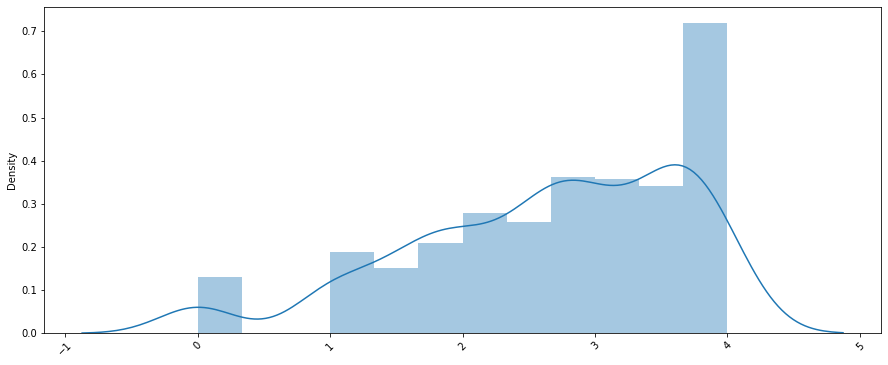

<Figure size 432x288 with 0 Axes>

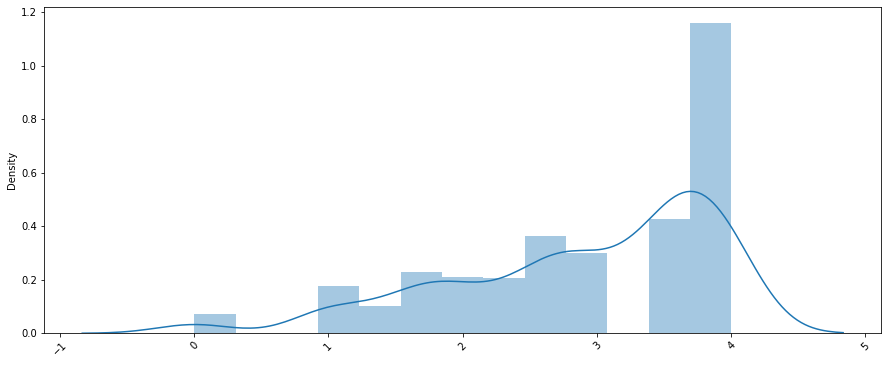

<Figure size 432x288 with 0 Axes>

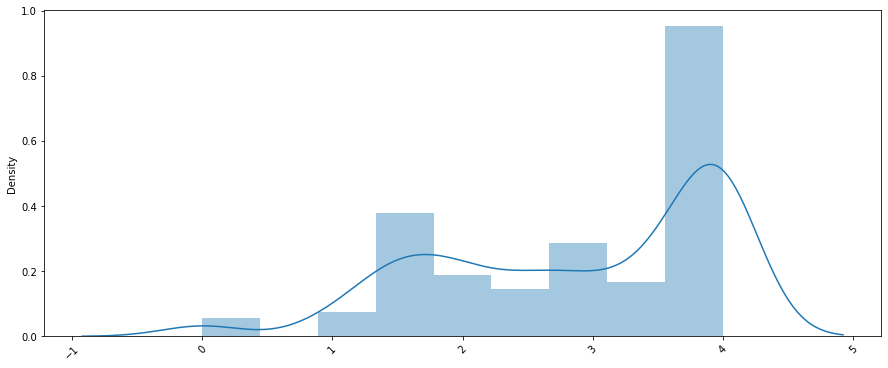

<Figure size 432x288 with 0 Axes>

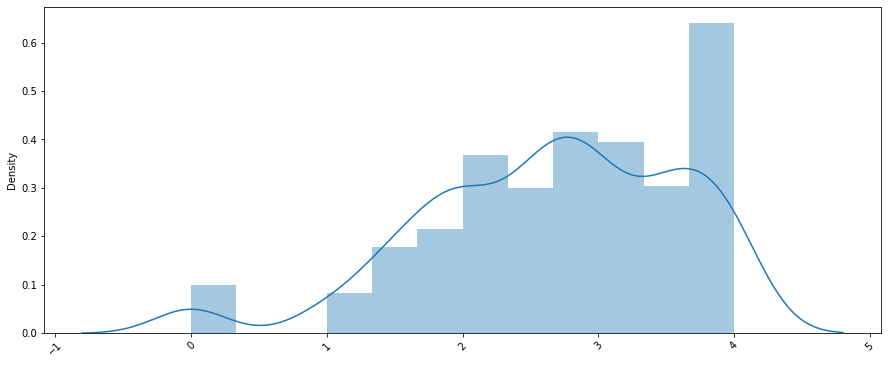

<Figure size 432x288 with 0 Axes>

In [21]:
for i in categorical.columns:
        plt.figure(figsize=(15,6))
        sns.distplot(x=df[i])
        plt.xticks(rotation=45)
        plt.figure()

# Bi/Multi Variate Analysis

<AxesSubplot: xlabel='PH-121', ylabel='CGPA'>

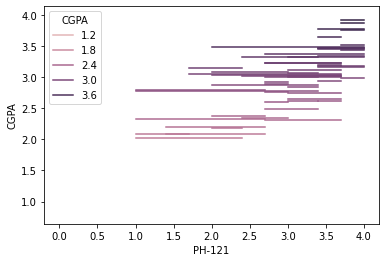

In [22]:
sns.lineplot(data=df, x="PH-121", y="CGPA", hue="CGPA")

Text(0.5, 1.0, 'For PH-121 final grade?')

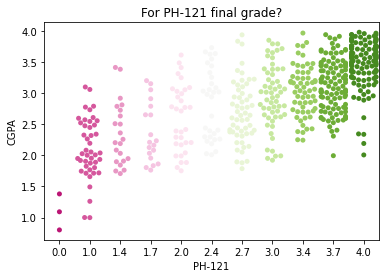

In [23]:
b = sns.swarmplot(x='PH-121', y='CGPA', data=df,palette='PiYG')
b.axes.set_title('For PH-121 final grade?')

In [24]:
import plotly.express as px
fig = px.scatter(df, x='CS-317',y='CGPA',template="ggplot2")
fig.update_layout(title="Distribution of CS-317 student indicators")
fig.show()

# Looking for Correlations

<AxesSubplot: >

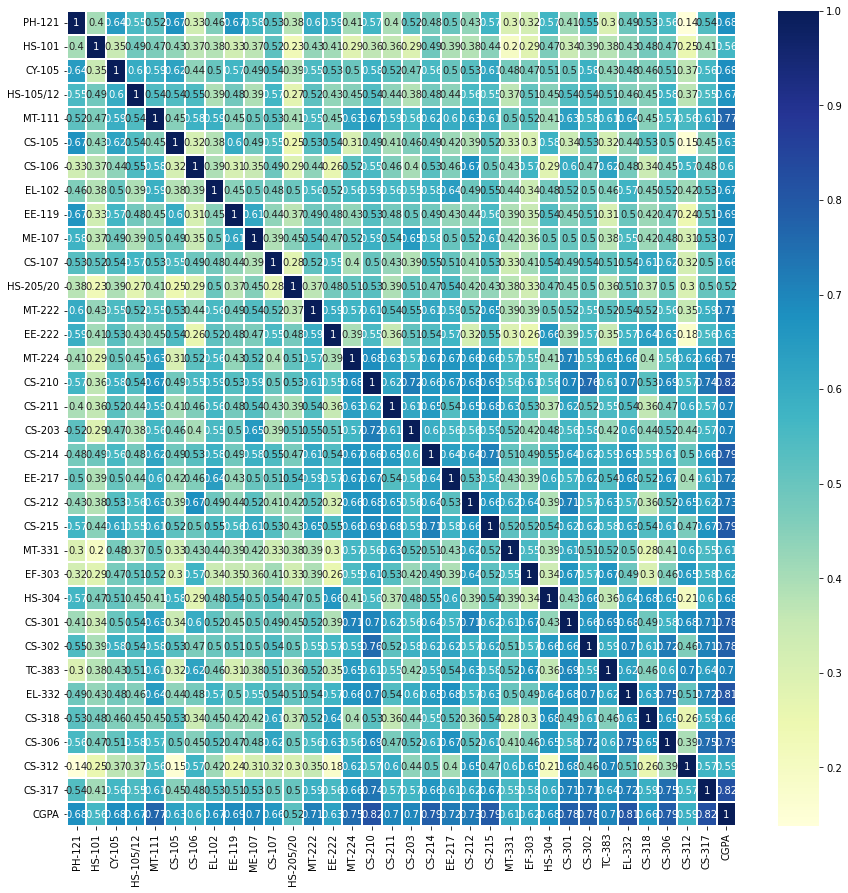

In [25]:
# Looking for correlations
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',linewidths=2.0,annot_kws={'size':10})

In [26]:
df.describe().style.background_gradient(cmap = "summer")

Observations:

1.count is same for all columns hence no null values present

2.Mean < Median for columns (left skewed): for most of the columns.however they are close to normal distribution as the difference is small

3.> difference between 75% && max for most of the columns..so outliers can exist

In [27]:
#Verify Skewness
df.skew().sort_values(ascending=False)

HS-101      -0.227717
CS-214      -0.251505
CS-211      -0.388519
ME-107      -0.399327
MT-222      -0.430584
CS-215      -0.440605
CGPA        -0.497203
EF-303      -0.580085
HS-105/12   -0.599766
CS-203      -0.616304
CS-317      -0.625574
CS-312      -0.631603
TC-383      -0.669712
CS-107      -0.673185
CS-318      -0.701601
CS-212      -0.715871
MT-224      -0.753516
CS-301      -0.806083
EL-102      -0.853111
EE-119      -0.857386
MT-111      -0.863246
PH-121      -0.883809
CS-306      -0.899600
EL-332      -0.917194
HS-304      -0.930804
CS-106      -1.013401
MT-331      -1.029391
EE-222      -1.203849
EE-217      -1.216911
CS-210      -1.245586
CS-302      -1.263406
CS-105      -1.274883
CY-105      -1.405404
HS-205/20   -1.760646
dtype: float64

Observations:

Skewness range: (+0.28,-0.28)

# Checking Outliers

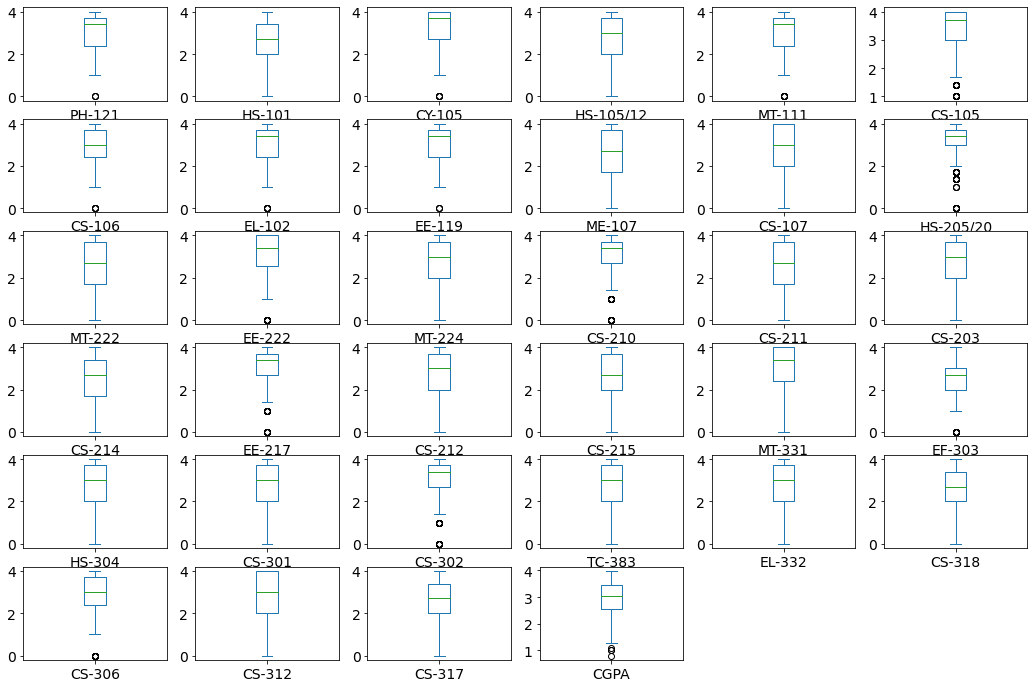

In [28]:
df.plot(kind="box",subplots=True,layout=(6,6),fontsize=14,figsize=(18,12))
plt.show()

# Removing Outliers

In [29]:
features=df.drop("CGPA",axis=1)
target = df['CGPA']
from scipy.stats import zscore
z=np.abs(zscore(features))
threshold=3
np.where(z>3)

features.shape,target.shape
#print(len(features))

((571, 33), (571,))

In [30]:
features_new=features[(z<3).all(axis=1)]
target_new=target[(z<3).all(axis=1)]
#print(len(features_new))
features=features_new
target=target_new

(np.abs(zscore(features))<3).all().all()
features.shape,target.shape

((552, 33), (552,))

In [31]:
loss_percent=(len(df)-len(features_new))/len(df)*100
loss_percent

3.327495621716287

Observations:

Data loss is less than 10% hence it is acceptable

# Build Model : Predict final CGPA based on GPAs

In [32]:
# features
display(features)
target=pd.DataFrame(target,columns =['CGPA'])
display(target)

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0       2.7     1.4     1.7        2.0     1.7     1.4     1.0     1.7   
1       4.0     1.0     1.4        1.0     2.7     2.0     1.0     4.0   
2       4.0     3.0     4.0        2.7     3.4     4.0     2.7     3.4   
3       1.0     2.4     1.4        1.0     1.0     3.7     1.4     1.7   
4       3.7     3.7     3.7        3.4     4.0     4.0     3.7     3.4   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566     3.0     4.0     4.0        3.7     4.0     4.0     3.7     3.7   
567     4.0     4.0     4.0        4.0     4.0     4.0     4.0     3.7   
568     3.0     4.0     3.7        3.4     4.0     4.0     4.0     4.0   
569     4.0     3.4     1.0        4.0     1.0     1.4     2.7     1.7   
570     2.0     1.0     1.0        2.0     2.0     1.4     3.0     2.4   

     EE-119  ME-107  ...  EF-303  HS-304  CS-301  CS-302  TC-383  EL-332  \
0       2.7     1.7  ...     1.7     2.4     3.0     2.0     2.4     2.0   
1       1.4     1.0  ...     1.0     1.7     3.7     1.4     1.7     2.0   
2       3.7     3.7  ...     2.4     4.0     3.4     3.7     3.0     3.4   
3       1.0     2.4  ...     1.0     2.7     1.0     2.7     1.4     1.4   
4       4.0     3.7  ...     1.7     3.7     2.7     3.7     2.4     3.7   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566     4.0     3.4  ...     3.0     3.7     3.7     4.0     4.0     4.0   
567     4.0     4.0  ...     4.0     4.0     4.0     4.0     4.0     4.0   
568     4.0     3.0  ...     3.0     2.7     3.4     3.4     4.0     3.0   
569     2.7     1.7  ...     1.0     2.0     2.0     2.4     1.7     1.0   
570     2.0     1.4  ...     1.0     0.0     1.0     1.0     2.0     0.0   

     CS-318  CS-306  CS-312  CS-317  
0       1.7     2.0     1.7     1.7  
1       3.7     1.0     1.4     1.0  
2       3.7     3.7     3.0     3.0  
3       3.4     1.7     1.4     2.0  
4       2.7     3.7     2.7     3.4  
..      ...     ...     ...     ...  
566     4.0     3.4     3.7     3.7  
567     4.0     3.7     3.4     3.4  
568     2.4     3.4     3.7     3.0  
569     2.7     3.4     1.0     3.0  
570     1.7     1.4     2.4     2.0  

[552 rows x 33 columns]

CGPA
0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
..     ...
566  3.798
567  3.772
568  3.470
569  2.193
570  1.753

[552 rows x 1 columns]

In [33]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20)

# Build Model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

lr=LinearRegression() # instance for linearregression

# Find the best random state value where training r2-score = testing r2-score

Random_State=[]
Training_r2_score=[]
Testing_r2_score=[]
Difference=[]

# Get the random state value where training r2-score = testing r2-score
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_r2_score.append(r2_score(y_train,pred_train)*100)
        Testing_r2_score.append(r2_score(y_test,pred_test)*100)
        Difference.append(abs((r2_score(y_test,pred_test)*100)-(r2_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training R2 Score":Training_r2_score,"Testing R2 Score":Testing_r2_score,"Difference in R2 Score":Difference})
print("Table of random state values with training r2_score = testing r2_score")
RS_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Table of random state values with training r2_score = testing r2_score


Random State  Training R2 Score  Testing R2 Score  Difference in R2 Score
13           267          99.043118         99.043216                0.000098
28           544          99.054208         99.053229                0.000979
42           845          99.051874         99.053697                0.001823
36           696          99.058863         99.056734                0.002129
50           978          99.057571         99.055360                0.002210
29           545          99.055850         99.053047                0.002804
47           953          99.058461         99.055600                0.002861
10           236          99.050576         99.053568                0.002992
9            235          99.051799         99.054892                0.003093
35           689          99.048538         99.045352                0.003185
11           253          99.043840         99.047064                0.003224
24           434          99.044002         99.047464                0.003461
31           595          99.063683         99.060047                0.003636
14           275          99.047406         99.043545                0.003861
0             14          99.049853         99.045849                0.004004
43           849          99.055796         99.060479                0.004684
19           377          99.057538         99.052776                0.004762
5            209          99.041683         99.046569                0.004886
45           905          99.038207         99.032923                0.005284
20           395          99.063879         99.058224                0.005655
7            212          99.061950         99.067654                0.005704
33           612          99.047143         99.040733                0.006409
27           531          99.050914         99.057669                0.006755
37           713          99.052390         99.060205                0.007815
3            164          99.030440         99.038458                0.008018
26           529          99.053124         99.061959                0.008835
16           319          99.036273         99.026760                0.009513
2            163          99.060861         99.051248                0.009613
39           733          99.052745         99.063505                0.010760
12           254          99.033506         99.045718                0.012212
21           398          99.055977         99.068835                0.012858
41           795          99.048034         99.034900                0.013134
8            220          99.055819         99.069165                0.013346
49           966          99.062032         99.076704                0.014672
48           956          99.052916         99.068499                0.015583
32           597          99.059554         99.075707                0.016154
38           719          99.051342         99.069847                0.018505
6            210          99.050812         99.071700                0.020888
15           299          99.058587         99.080766                0.022179
44           885          99.050608         99.072912                0.022304
22           408          99.051146         99.076197                0.025052
34           651          99.050416         99.076527                0.026111
4            177          99.050776         99.081442                0.030666
1             92          99.042073         99.009737                0.032337
25           496          99.039753         99.006435                0.033317
23           414          99.057809         99.091380                0.033571
30           571          99.052469         99.088345                0.035876
46           936          99.050923         99.087973                0.037050
17           332          99.050234         99.087331                0.037096
51           992          99.054162         99.091335                0.037173
40           735          

In [35]:
# best random state where training r2 score equal to testing r2 score
RSN=RS_table["Random State"][RS_table["Difference in R2 Score"]==RS_table["Difference in R2 Score"].min()]
BestRandomState=np.array(RSN)[0]
print("BestRandom State from Linear Regression",BestRandomState)

BestRandom State from Linear Regression 267


In [36]:
# Use the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=BestRandomState)

In [37]:
# Train the model and checkg  metrics with fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("Model : Linear Regression")
print("R2 Score : ",r2_score(y_test,pred_test))
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred_test))
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred_test)))

Model : Linear Regression
R2 Score :  0.990432158777876
Mean Absolute Error(MAE) :  0.04379183793851478
Mean Squared Error(MSE) :  0.0031630113553278248
Root Mean Squared Error(RMSE) :  0.05624065571566378


# Cross Validation for Linear Regression

In [38]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=r2_score(y_test,pred_lr)

# Find the optimized folds from Linear Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,features,target,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation R2 Score":CV_Score,"Model R2 Score":Model_Score,"Difference in R2 Score":Difference})  
print("Cross Validation Details with Folds")
CV_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Cross Validation Details with Folds


No of Folds  Cross Validation R2 Score  Model R2 Score  \
7            9                  98.843208       99.043216   
8           10                  98.813706       99.043216   
6            8                  98.803478       99.043216   
5            7                  98.799837       99.043216   
4            6                  98.759640       99.043216   
3            5                  98.712496       99.043216   
1            3                  98.426524       99.043216   
2            4                  98.091064       99.043216   
0            2                  97.518639       99.043216   

   Difference in R2 Score  
7                0.002000  
8                0.002295  
6                0.002397  
5                0.002434  
4                0.002836  
3                0.003307  
1                0.006167  
2                0.009522  
0                0.015246

In [39]:
# Get best no. of folds where the least difference between cross validation score & model score
CVF=CV_table["No of Folds"][CV_table["Difference in R2 Score"]==CV_table["Difference in R2 Score"].min()]
BCV=np.array(CVF)[0]
print("Best Cross Validation score is :",BCV)

Best Cross Validation score is : 9


In [40]:
# Use best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,features,target,cv=BCV).mean()
print("The CV r2 score is:",lsscore_selected*100,"\nThe model r2 score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV r2 score is: 98.84320800958393 
The model r2 score is: 99.0432158777876
Difference is: 0.0020000786820366656


# Other Regression Algorithms

In [41]:
from sklearn.tree import DecisionTreeRegressor          # DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor       # KNeighborsRegressor
from sklearn.linear_model import SGDRegressor           # Gradient Descent Regressor
from sklearn.svm import SVR                             # Support Vector Regressor
from sklearn.linear_model import Lasso                  # Lasso Regressor
from sklearn.linear_model import Ridge                  # Ridge Regressor
from sklearn.linear_model import ElasticNet             # Elastic Net Regressor
from sklearn.ensemble import RandomForestRegressor      # RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor        # ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor  # GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor          # AdaBoostRegressor
from xgboost import XGBRegressor                        # XGBRegressor

# list of all Algorithms
models=[('SGDRegressor()',SGDRegressor()),('SVR()',SVR()),('Lasso()',Lasso()),('Ridge()',Ridge()),
        ('RandomForestRegressor()',RandomForestRegressor()),
        ('ExtraTreesRegressor()',ExtraTreesRegressor()),('GradientBoostingRegressor()',GradientBoostingRegressor()),
        ('AdaBoostRegressor()',AdaBoostRegressor()),('XGBRegressor()',XGBRegressor())]

#  empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[abs(lss-lsscore_selected)]
MAE=[mean_absolute_error(y_test,pred_lr)]
MSE=[mean_squared_error(y_test,pred_lr)]
RMSE=[np.sqrt(mean_squared_error(y_test,pred_lr))]

# Loop  all algorithms to train the model & check for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(r2_score(y_test,pred_test)*100)        # "R2 Score" to the list 
    MAE.append(mean_absolute_error(y_test,pred_test))         #  "MAE" to the list 
    MSE.append(mean_squared_error(y_test,pred_test))          #  "MSE" to the list 
    RMSE.append(np.sqrt(mean_squared_error(y_test,pred_test)))#  "RMSE" to the list 
    
    score=cross_val_score(model[1],features,target,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                #  "cross validation score" to the list
    Difference.append(abs(r2_score(y_test,pred_test)-score)) # "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    #  "Model" to the list

#e dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model R2 Score':Model_Score,'Cross Validation R2 Score':CV_Score,'Difference in R2 Score':Difference,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
print("DataFrame with all model metrics")
score_table[score_table["Difference in R2 Score"]<100].sort_values(by=["Difference in R2 Score"],ascending=True)  

DataFrame with all model metrics


Model  Model R2 Score  Cross Validation R2 Score  \
1               SGDRegressor()       98.229853                  98.160191   
0           LinearRegression()       99.043216                  98.843208   
4                      Ridge()       99.049122                  98.844294   
2                        SVR()       97.581358                  96.882476   
7  GradientBoostingRegressor()       97.593481                  96.210806   
6        ExtraTreesRegressor()       97.671454                  96.038777   
3                      Lasso()       -0.006346                  -1.667832   
8          AdaBoostRegressor()       93.817590                  92.141924   
5      RandomForestRegressor()       96.776206                  94.949904   
9               XGBRegressor()       95.100749                  93.141800   

   Difference in R2 Score       MAE       MSE      RMSE  
1                0.000697  0.054779  0.005852  0.076498  
0                0.002000  0.043792  0.003163  0.056241  
4                0.002048  0.043696  0.003143  0.056067  
2                0.006989  0.071195  0.007996  0.089419  
7                0.013827  0.067404  0.007956  0.089194  
6                0.016327  0.069513  0.007698  0.087738  
3                0.016615  0.480308  0.330609  0.574986  
8                0.016757  0.122973  0.020438  0.142963  
5                0.018263  0.080548  0.010657  0.103235  
9                0.019589  0.097972  0.016196  0.127265

Observations:

Best model( Ridge Regressor) for this dataset because of:

    1.highest R^2 score

    2.lowest root mean squared error

Out of all algorithms checked,Ridge Regressor model is selected for hyper parameter tuning

as the difference between model and cross-validation score is also less apart from LinearRegressior 
but due to high model score& CV score , Ridge is chosen

# Hyper Parameter Tuning

In [42]:
#Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
# Defining parameters for  Ridge Regression
parameters = {
            'alpha':[1.0,2.1],
             'fit_intercept':[True, False],
            'copy_X':[True, False],
            'tol':[0.1,1.0,1.1],
            'solver':['lbfgs', 'lsqr'],
            'positive':[True,False],
            'random_state':[40,50]      
            }

GCV=GridSearchCV(Ridge(),parameters,cv=BCV)  
GCV.fit(x_train,y_train)   #  GridSearchCV to train model with all combination of parameters
GCV.best_params_ 

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'positive': True,
 'random_state': 40,
 'solver': 'lbfgs',
 'tol': 0.1}

In [43]:
Rdg=Ridge(alpha=GCV.best_params_['alpha'],copy_X=GCV.best_params_['copy_X'],fit_intercept=GCV.best_params_['fit_intercept'],
            tol=GCV.best_params_['tol'],solver=GCV.best_params_['solver'],
            positive=GCV.best_params_['positive'],random_state=GCV.best_params_['random_state'])
Rdg.fit(x_train,y_train)
Rdg.score(x_train,y_train)
pred_decision=Rdg.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print("R2 Score:",rfs*100)

rfscore=cross_val_score(Rdg,features,target,cv=2)
rfc=rfscore.mean()
print("Cross Val Score:",rfc*100)
print("Difference is:",r2_score(y_test,pred_decision)-rfc)


R2 Score: 99.01938644869237
Cross Val Score: 98.32169489861909
Difference is: 0.006976915500732872


Observations:

Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is 0.00697

Model with default parameters: The difference between Cross Validation Score and model score is 0.00204

As difference is less in the model with default parameters We will consider the Ridge Regression model with default parameters

In [44]:
#models selected ===Ridge()
print(models[3][1])
x_predict = list(models[3][1].predict(x_test))
#creating new dataframe
pd.DataFrame(x_predict).head(10)

Ridge()


0
0  2.321812
1  3.585183
2  3.404833
3  3.826071
4  3.690663
5  2.822637
6  3.220146
7  2.162419
8  2.115807
9  3.347369

In [45]:
cgpa_newStduent = [[2.7,2.4,2.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7,
                2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,2.4,3.0,2.0,2.4]]

#Predict CGPA for new stduent Data
#model ===SVR()
StudentGrade_predict =models[3][1].predict(cgpa_newStduent)
print(StudentGrade_predict)

[[2.14392456]]


# Save Model

In [46]:
#ridge()
print("Model Saved--", models[3][1])
import pickle
file = 'StudentGrade_predict'
save = pickle.dump(models[3][1],open('StudentGrade_predict.pkl','wb'))

Model Saved-- Ridge()


# Conclusion

In [47]:
pickled_StudentGrade_predict = pickle.load(open('StudentGrade_predict.pkl','rb'))
result=pickled_StudentGrade_predict.score(x_test,y_test)
print(result)

CGPA_Predicted=pickled_StudentGrade_predict.predict(x_test)
df_predicted = pd.DataFrame(CGPA_Predicted, columns =['CGPA_Predicted'])
print("\nCGPA_Predicted list based on Test data provided: ")
display(df_predicted)


0.9904912185263036

CGPA_Predicted list based on Test data provided: 


CGPA_Predicted
0          2.321812
1          3.585183
2          3.404833
3          3.826071
4          3.690663
..              ...
106        3.787458
107        3.271436
108        3.444875
109        2.929425
110        2.935735

[111 rows x 1 columns]